In [1]:
#          ######################################################################################################
#          #                                           IN THE NAME OF ALLAH                                     #
#          #             STEEL-CONCRETE COMPOSITE PLATE GIRDERS BRIDGE SUPERSTRUCTURE OPTIMIZATION              #
#          #               RUNNING MOMENT-CURVATURE, PUSHOVER AND DYNAMIC ANALYSIS FOR CALCULATE                #
#          #                               OPTIMUM STRUCTURAL DUCTILIY DAMAGE INEX                              #
#          #----------------------------------------------------------------------------------------------------#
#          #                                   EIGHT OPTIMIZAION ALOGORITHM METHOD:                             #
#          #                                    [1] Newton-Raphson Method                                       #
#          #                                    [2] Genetic Algorithm Method                                    #
#          #                                    [3] Firefly Algorithm Method                                    #
#          #                                    [4] Ant colony Algorithm Method                                 #
#          #                                    [5] Artificial Bee Colony Algorithm Method                      #
#          #                                    [6] Particle Swarm Algorithm Method                             #
#          #                                    [7] Differential Evolution Algorithm Method                     #
#          #                                    [8] Artificial Neural Networks Algorithm Method                 #
#          #----------------------------------------------------------------------------------------------------#
#          #                          THIS PROGRAM WRITTEN BY SALAR DELAVAR QASHQAI                             #
#          #                               EMAIL: salar.d.ghashghaei@gmail.com                                  #
#          ######################################################################################################

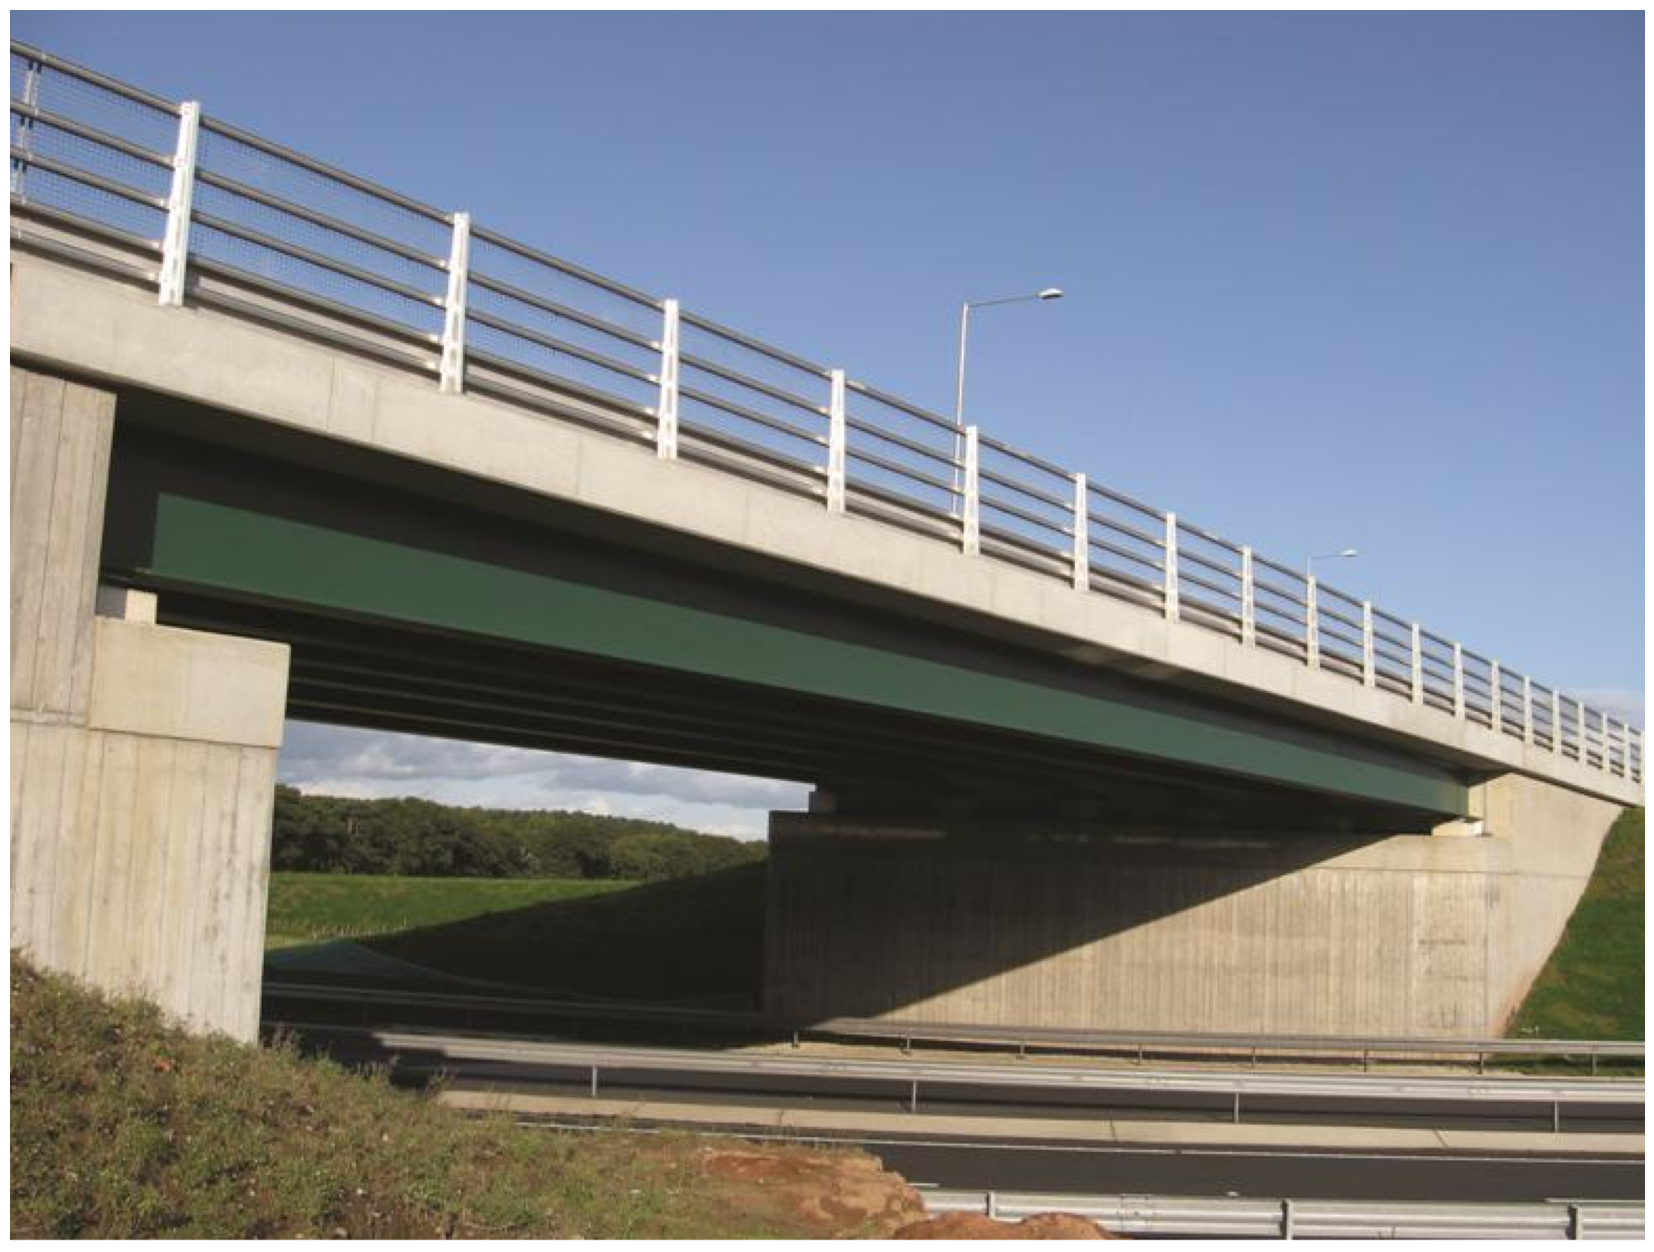

In [2]:
# Load the image
def PLOT_IMAGE(image):
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    image = mpimg.imread(image_path)

    # Display the image
    plt.figure(figsize=(30, 16))
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.show()
    
image_path = 'OPENSEES_SINGLE_SPAN_SIMPLY_SUPPORTED_COMPOSITE_BRIDGE_00.png'    
PLOT_IMAGE(image_path)

In [3]:
# BRIDGE IMAGES AND DATA
'https://www.steelconstruction.info/A1_Peterborough_to_Blyth'
# BOOK: Finite Element Analysis and Design of Steel and Steel–Concrete Composite Bridges
'https://www.sciencedirect.com/book/9780124172470/finite-element-analysis-and-design-of-steel-and-steel-concrete-composite-bridges'
# BOOK: Steel-concrete composite bridge design guide
'https://www.nzta.govt.nz/assets/resources/research/reports/525/docs/525.pdf' 
# PAPER: Seismic damage prediction by deterministic methods: Concepts and procedures
'https://onlinelibrary.wiley.com/doi/10.1002/eqe.4290160507'

'https://onlinelibrary.wiley.com/doi/10.1002/eqe.4290160507'

In [4]:
# pip install openseespy
# pip install --upgrade openseespy
# pip install opsvis

In [5]:
#import the os module
import os
import time
import numpy as np
import openseespy.opensees as op
import opsvis as opsv
import matplotlib.pyplot as plt

In [7]:
#to create a directory at specified path with name "Data"
os.mkdir('C:\\OPENSEESPY_SALAR')

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:\\OPENSEESPY_SALAR'

In [8]:
FOLDER_NAME = 'COMPOSITE_BRIDGE_OPTIMIZATION'
dir = f"C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}\\"
if not os.path.exists(dir):
    os.makedirs(dir)

In [9]:
## DELETE ALL FILES IN DIRECTORY 
def DELETE_FOLDER_CONTANTS(folder_path):
    import os
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
        except Exception as e:
            print(f"Failed to delete {file_path}. Reason: {e}")
    print("Deletion done")
   
FOLDER_PATH = f'C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}'  # Specify the folder path
#DELETE_FOLDER_CONTANTS(FOLDER_PATH)   

In [10]:
# OUTPUT DATA ADDRESS:
SALAR_DIR = f'C://OPENSEESPY_SALAR//{FOLDER_NAME}//';

In [11]:
def HISROGRAM_BOXPLOT(X, HISTO_COLOR, LABEL):
    import numpy as np
    import matplotlib.pyplot as plt
    X = np.array(X)
    print("-------------------------")
    from scipy.stats import skew, kurtosis
    MINIMUM = np.min(X)
    MAXIMUM = np.max(X)
    #MODE = max(set(X), key=list(X).count)
    MEDIAN = np.quantile(X, .50)#q2
    MEAN = np.mean(X)
    STD = np.std(X)
    q1 = np.quantile(X, .25)
    q3 = np.quantile(X, .75)
    SKEW = skew(X)
    KURT = kurtosis(X)
    #SKEW = (MEAN - MODE) / STD
    #KURT = (np.mean((X - MEAN)**4) / STD**4)
    # Estimate confidence intervals of the output variable
    lower_bound = np.quantile(X, .05)
    upper_bound = np.quantile(X, .95)
    print("Box-Chart Datas: ")
    print(f'Minimum: {MINIMUM:.4f}')
    print(f'First quartile: {q1:.4f}')
    #print(f'Mode: {MODE:.4f}')
    print(f'Median: {MEDIAN:.4f}')
    print(f'Mean: {MEAN:.4f}')
    print(f'Std: {STD:.4f}')
    print(f'Third quartile: {q3:.4f}')
    print(f'Maximum: {MAXIMUM :.4f}')
    print(f'Skewness: {skew(X) :.4f}')
    print(f'kurtosis: {kurtosis(X) :.4f}')
    print(f"90% Confidence Interval: ({lower_bound:.4f}, {upper_bound:.4f})")
    print("-------------------------")

    plt.figure(figsize=(10,6))
    # Plot histogram of data
    count, bins, ignored = plt.hist(X, bins=100, color=HISTO_COLOR, density=True, align='mid')#, edgecolor="black"
    
    # Plot lognormal PDF
    x = np.linspace(min(bins), max(bins), 10000)
    pdf = (np.exp(-(x - MEAN)**2 / (2 * STD**2)) / (STD * np.sqrt(2 * np.pi)))
    plt.plot(x, pdf, linewidth=2, color='r', label="Normal PDF")
    
    # Plot vertical lines for risk measures
    plt.axvline(q1, color="black", linestyle="--", label=f"Quantile 0.25: {q1:.4f}")
    plt.axvline(MEDIAN, color="green", linestyle="--", label=f"Median: {MEDIAN:.4f}")
    plt.axvline(q3, color="black", linestyle="--", label=f"Quantile 0.75: {q3:.4f}")
    #plt.axvline(MODE, color="purple", linestyle="--", label=f"Mode: {MODE:.4f}")
    plt.axvline(MEAN, color="red", linestyle="--", label=f"Mean: {MEAN:.4f}")
    plt.axvline(MEAN-STD, color="blue", linestyle="--", label=f"Mean-Std: {MEAN-STD:.4f}")
    plt.axvline(MEAN+STD, color="blue", linestyle="--", label=f"Mean+Std: {MEAN+STD:.4f}")
    plt.xlabel(LABEL)
    plt.ylabel("Frequency")
    prob = np.sum(X > 0) / len(X)
    plt.title(f"Histogram - Probability of Positive {LABEL} is {100*prob:.2f} %")
    plt.legend()
    #plt.grid()
    plt.show()

    #Plot boxplot with outliers
    plt.figure(figsize=(10,6))
    plt.boxplot(X, vert=0)
    # Write the quartile data on the chart
    plt.text(q1, 1.05, f" Q1: {q1:.4f}")
    plt.text(MEDIAN, 1.1, f" Q2: {MEDIAN:.4f}")
    plt.text(q3, 1.05, f" Q3: {q3:.4f}")
    #plt.text(MODE, 1.15, f" Mode: {MODE:.4f}")
    
    #plt.text(MEAN, 0.9, f" Mean: {MEAN:.4f}")
    #plt.text(MEAN-STD, 0.9, f" Mean-Std: {MEAN-STD:.4f}")
    #plt.text(MEAN+STD, 0.9, f" Mean+Std: {MEAN+STD:.4f}")
    plt.scatter(MEAN, 1, color="red", marker="+", s=200, label=f"Mean: {MEAN:.4f}")
    plt.scatter(MEAN-STD, 1, color="green", marker="X", s=200, label=f"Mean-Std: {MEAN-STD:.4f}")
    plt.scatter(MEAN+STD, 1, color="blue", marker="*", s=200, label=f"Mean+Std:  {MEAN+STD:.4f}")
    plt.xlabel(LABEL)
    plt.ylabel("Data")
    plt.title(f"Boxplot of {LABEL}")
    plt.legend()
    plt.grid()
    plt.show()
# -----------------------------------------------    
def HISTOGRAM_BOXPLOT_PLOTLY( DATA, XLABEL='X', TITLE='A', COLOR='cyan'):
    # Plotting histogram and boxplot
    import plotly.express as px
    fig = px.histogram(x=DATA, marginal="box", color_discrete_sequence=[COLOR])
    fig.update_layout(title=TITLE, xaxis_title=XLABEL, yaxis_title="Frequency")
    fig.show()     
# -----------------------------------------------
def PLOT_TIME_HIS(x, xlabel, y1, y1label, y2, y2label, y3, y3label, y4, y4label, Z, LOGX, LOGY):
    ## PLOT THE DATA
    import numpy as np
    import matplotlib.pyplot as plt
    # Define colors for each dataset
    colors = ['b', 'g', 'r', 'c']

    # Create subplots based on the value of Z
    fig, axs = plt.subplots(Z, 1, figsize=(14, 14))

    # Plot each dataset with a different color
    for i, y_data in enumerate([y1, y2, y3, y4][:Z]):
        axs[i].plot(x, y_data, color=colors[i])
        axs[i].set_title(f"{[y1label, y2label, y3label, y4label][i]} - MAX ABS: {np.max(np.abs(y_data)):.6e}")
        axs[i].set_xlabel(xlabel)
        #axs[i].set_ylabel()
        axs[i].grid()
        if LOGX == 1:
            axs[i].semilogx()
        if LOGY == 1:
            axs[i].semilogy()    

    # Adjust layout
    plt.tight_layout()
    plt.show()  
# -----------------------------------------------    
def MAXABS_FUN(DATA_FILE, COLUMN, I, J, Z):
    import numpy as np
    # Read and process displacement data
    if Z == 1:
        NameFiles = DATA_FILE
        filename = f"{NameFiles}_{I}.txt"
        D = np.loadtxt(filename)
        #print(D)
        MAXABS = np.max(np.abs([D[:, COLUMN]]))
    if Z == 2:
        NameFiles = DATA_FILE
        filename = f"{NameFiles}_{I}_{J}.txt"
        D = np.loadtxt(filename)
        #print(D)
        MAXABS = np.max(np.abs([D[:, COLUMN]]))    
    #print("MAX. ABS. :", MAXABS)
    return MAXABS
# -----------------------------------------------
def PLOT_2D(X, Y, Xfit, Yfit, X2, Y2, XLABEL, YLABEL, TITLE, LEGEND01, LEGEND02, LEGEND03, COLOR, Z):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12, 8))
    if Z == 1:
        # Plot 1 line
        plt.plot(X, Y,color=COLOR)
        plt.xlabel(XLABEL)
        plt.ylabel(YLABEL)
        plt.title(TITLE)
        plt.grid(True)
        plt.show()
    if Z == 2:
        # Plot 2 lines
        plt.plot(X, Y, Xfit, Yfit, 'r--', linewidth=3)
        plt.title(TITLE)
        plt.xlabel(XLABEL)
        plt.ylabel(YLABEL)
        plt.legend([LEGEND01, LEGEND02], loc='lower right')
        plt.grid(True)
        plt.show()
    if Z == 3:
        # Plot 3 lines
        plt.plot(X, Y, Xfit, Yfit, 'r--', X2, Y2, 'g-*', linewidth=3)
        plt.title(TITLE)
        plt.xlabel(XLABEL)
        plt.ylabel(YLABEL)
        plt.legend([LEGEND01, LEGEND02, LEGEND03], loc='lower right')
        plt.grid(True)
        plt.show() 
# -----------------------------------------------
def OUTPUT_SECOND_COLUMN(FOLDER, X, COLUMN, I, Z):
    import numpy as np
    # Time History
    if Z == 1:
        filename = f"C:\\OPENSEESPY_SALAR\\{FOLDER}\\{X}.txt"
        data_collected = np.loadtxt(filename)
        X = data_collected[:, COLUMN]
    if Z == 2:
        filename = f"C:\\OPENSEESPY_SALAR\\{FOLDER}\\{X}_{I}.txt"
        data_collected = np.loadtxt(filename)
        X = data_collected[:, COLUMN]    
    return X 
# -----------------------------------------------
def BILNEAR_CURVE(Cur, Mom, SLOPE_NODE):
    import numpy as np
    # bilinear fitting
    SIZE = len(Mom)
    hh = np.zeros(SIZE-1)
    Aa = np.zeros(SIZE-1)
    for i in range(SIZE-1):
        hh[i] = Cur[i+1] - Cur[i]
        Aa[i] = (Mom[i] + Mom[i+1]) * 0.5 * hh[i]

    Area = sum(Aa)
    k0 = Mom[SLOPE_NODE] / Cur[SLOPE_NODE]
    fiy = (Mom[i+1] * max(Cur) * 0.5 - Area) / (Mom[i+1] * 0.5 - k0 * max(Cur) * 0.5)
    My = k0 * fiy
    X = np.array([0, fiy, max(Cur)])
    Y = np.array([0, My, Mom[i+1]])
    
    # EI and Ductility_Rito
    Elastic_ST = Y[1] / X[1]
    Plastic_ST = Y[2] / X[2]
    Tangent_ST = (Y[2] - Y[1]) / (X[2] - X[1])
    Ductility_Rito = X[2] / X[1]
    Over_Strength_Factor = Y[2] / Y[1]
    """
    # MOMENT-CURVAVTURE ANALYSIS
    print('+==========================+')
    print('=   Analysis curve fitted =')
    print('  Curvature    Moment')
    print('----------------------------')
    print(np.column_stack((X.T, Y.T)))
    print('+==========================+')
    print('+--------------------------------------------------------------------+')
    print(f' Elastic Flextural Rigidity :             {Elastic_EI:.2f}')
    print(f' Plastic Flextural Rigidity :             {Plastic_EI:.2f}')
    print(f' Tangent Flextural Rigidity :             {Tangent_EI:.2f}')
    print(f' Section Ductility Ratio :                {Ductility_Rito:.2f}')
    print(f' Section Over Stregth Factor:             {Over_Stregth_Factor:.2f}')
    print('+--------------------------------------------------------------------+')
    """
    """
    # PUSHOVER ANALYSIS
    print('+==========================+')
    print('=   Analysis curve fitted =')
    print('     Disp       Baser Shear')
    print('----------------------------')
    print(np.column_stack((X.T, Y.T)))
    print('+==========================+')
    print('+----------------------------------------------------+')
    print(f' Structure Elastic Stiffness :     {Elastic_ST:.2f}')
    print(f' Structure Plastic Stiffness :     {Plastic_ST:.2f}')
    print(f' Structure Tangent Stiffness :     {Tangent_ST:.2f}')
    print(f' Structure Ductility Ratio :       {Ductility_Rito:.2f}')
    print(f' Structure Over Strength Factor:   {Over_Strength_Factor:.2f}')
    print('+----------------------------------------------------+')
    """
    return X, Y, Elastic_ST, Plastic_ST, Tangent_ST, Ductility_Rito, Over_Strength_Factor
# -----------------------------------------------
def PLOT_2D(X, Y, Xfit, Yfit, X2, Y2, XLABEL, YLABEL, TITLE, LEGEND01, LEGEND02, LEGEND03, COLOR, Z):
    import matplotlib.pyplot as plt
    #plt.figure(figsize=(12, 8))
    if Z == 1:
        # Plot 1 line
        plt.plot(X, Y,color=COLOR)
        plt.xlabel(XLABEL)
        plt.ylabel(YLABEL)
        plt.title(TITLE)
        plt.grid(True)
        plt.show()
    if Z == 2:
        # Plot 2 lines
        plt.plot(X, Y, Xfit, Yfit, 'r--', linewidth=3)
        plt.title(TITLE)
        plt.xlabel(XLABEL)
        plt.ylabel(YLABEL)
        plt.legend([LEGEND01, LEGEND02], loc='lower right')
        plt.grid(True)
        plt.show()
    if Z == 3:
        # Plot 3 lines
        plt.plot(X, Y, Xfit, Yfit, 'r--', X2, Y2, 'g-*', linewidth=3)
        plt.title(TITLE)
        plt.xlabel(XLABEL)
        plt.ylabel(YLABEL)
        plt.legend([LEGEND01, LEGEND02, LEGEND03], loc='lower right')
        plt.grid(True)
        plt.show() 
# -----------------------------------------------
def PLOT3D(X, Y, Z, XLABEL, YLABEL, ZLABEL, TITLE):
    import plotly.graph_objects as go
    # Create a 3D scatter plot
    fig = go.Figure(data=[go.Scatter3d(x=X, y=Y, z=Z, mode='markers', marker=dict(size=5, color=Z))])
    fig.update_layout(scene=dict(xaxis_title=XLABEL, yaxis_title=YLABEL, zaxis_title=ZLABEL), title=TITLE)
    fig.show()
# -----------------------------------------------     
# Create a scatter plot
def PLOT_SCATTER(X, Y , XLABEL, YLABEL, TITLE, COLOR, LOG, ORDER):
    import matplotlib.pyplot as plt
    # Calculate linear regression parameters
    import numpy as np
    coefficients = np.polyfit(X, Y, ORDER)
    if ORDER == 1:
        a, b = coefficients
    if ORDER == 2:
        a, b, c = coefficients    
    if ORDER == 3:
        a, b, c, d = coefficients   
    if ORDER == 4:
        a, b, c, d, e = coefficients  
    if ORDER == 5:
        a, b, c, d, e, f = coefficients  
    if ORDER == 6:
        a, b, c, d, e, f, I = coefficients   
    if ORDER == 7:
        a, b, c, d, e, f, I, J = coefficients     
    y = [];yy = [];
    for i in range(len(X)):
        if ORDER == 1:
            y.append(a * X[i] + b)
        if ORDER == 2:
            y.append(a * X[i]**2 + b * X[i] + c)
        if ORDER == 3:
            y.append(a * X[i]**3 + b * X[i]**2 + c * X[i] + d)    
        if ORDER == 4:
            y.append(a * X[i]**4 + b * X[i]**3 + c * X[i]**2 + d * X[i] + e)  
        if ORDER == 5:
            y.append(a * X[i]**5 + b * X[i]**4 + c * X[i]**3 + d * X[i]**2 + e * X[i] + f)    
        if ORDER == 6:
            y.append(a * X[i]**6 + b * X[i]**5 + c * X[i]**4 + d * X[i]**3 + e * X[i]**2 + f * X[i] + I)     
        if ORDER == 7:
            y.append(a * X[i]**7 + b * X[i]**6 + c * X[i]**5 + d * X[i]**4 + e * X[i]**3 + f * X[i]**2 + I * X[i] + J)     
        yy.append(Y[i] - y[-1])
    y = np.array(y)    
    yy = np.array(yy) 
    # Calculate TSS
    Y_mean = np.mean(Y)
    TSS = np.sum((Y - Y_mean) ** 2)
    # Calculate RSS
    RSS = np.sum(yy ** 2)
    # Calculate R-squared
    R_squared = 1 - (RSS / TSS)
    #print(f"R-squared value: {R_squared:.4f}")
    plt.figure(figsize=(10,6))
    plt.scatter(X, Y, color=COLOR, marker='o', label='Data')
    # Add labels and title
    plt.xlabel(XLABEL)
    plt.ylabel(YLABEL)
    # Add the linear regression line
    if ORDER == 1:
        plt.plot(X, y, color='black', label=f'y = {a:.2f}x + {b:.2f} - R^2 = {R_squared:.3f}')
    if ORDER == 2:
        plt.plot(X, y, color='black', label=f'y = {a:.2f}x^2 + {b:.2f}x + {c:.2f} - R^2 = {R_squared:.3f}')
    if ORDER == 3:
        plt.plot(X, y, color='black', label=f'y = {a:.2f}x^3 + {b:.2f}x^2 + {c:.2f}x + {d:.2f} - R^2 = {R_squared:.3f}')  
    if ORDER == 4:
        plt.plot(X, y, color='black', label=f'y = {a:.2f}x^4 + {b:.2f}x^3 + {c:.2f}x^2 + {d:.2f}x + {e:.2f} - R^2 = {R_squared:.3f}') 
    if ORDER == 5:
        plt.plot(X, y, color='black', label=f'y = {a:.2f}x^5 + {b:.2f}x^4 + {c:.2f}x^3 + {d:.2f}x^2 + {e:.2f}x + {f:.2f} - R^2 = {R_squared:.3f}')  
    if ORDER == 6:
        plt.plot(X, y, color='black', label=f'y = {a:.2f}x^6 + {b:.2f}x^5 + {c:.2f}x^4 + {d:.2f}x^3 + {e:.2f}x^2 + {f:.2f}x + {I:.2f} - R^2 = {R_squared:.3f}')  
    if ORDER == 7:
        plt.plot(X, y, color='black', label=f'y = {a:.2f}x^7 + {b:.2f}x^6 + {c:.2f}x^5 + {d:.2f}x^4 + {e:.2f}x^3 + {f:.2f}x^2 + {I:.2f}x + {J:.2f} - R^2 = {R_squared:.3f}')               
    
    plt.title(TITLE)
    plt.grid(True)
    plt.legend()
    if LOG == 1:
        plt.semilogx();plt.semilogy();
    plt.show()

# -----------------------------------------------
def PLOT_SCATTER_PLOTLY(X, Y, XLABEL, YLABEL, TITLE, COLOR, LOG, ORDER):
    import plotly.graph_objects as go
    import numpy as np
    # Calculate linear regression parameters
    coefficients = np.polyfit(X, Y, ORDER)
    y = np.polyval(coefficients, X)
    
    # Calculate residuals
    residuals = Y - y
    
    # Calculate TSS
    Y_mean = np.mean(Y)
    TSS = np.sum((Y - Y_mean) ** 2)
    
    # Calculate RSS
    RSS = np.sum(residuals ** 2)
    
    # Calculate R-squared
    R_squared = 1 - (RSS / TSS)
    
    # Create scatter plot
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=X, y=Y, mode='markers', marker=dict(color=COLOR), name='Data'))
    
    # Add the regression line
    fig.add_trace(go.Scatter(x=X, y=y, mode='lines', line=dict(color='black'),
                             name=f'Fit: R^2 = {R_squared:.3f}'))
    
    # Add labels and title
    fig.update_layout(
        title=TITLE,
        xaxis_title=XLABEL,
        yaxis_title=YLABEL,
        showlegend=True
    )
    
    # Set log scale if needed
    if LOG == 1:
        fig.update_xaxes(type="log")
        fig.update_yaxes(type="log")
    
    fig.show() 
# -----------------------------------------------
def plot_scatter_plotly(X, Y, XLABEL, YLABEL, TITLE, COLOR):
    import plotly.express as px
    fig = px.scatter(x=X, y=Y, color_discrete_sequence=[COLOR], labels={XLABEL: XLABEL, YLABEL: YLABEL})
    fig.update_layout(title=TITLE, xaxis_type='log', yaxis_type='log')
    fig.show() 
# ----------------------------------------------- 
def PLOT_HEATMAP(df):
    import plotly.figure_factory as ff
    # Calculate the correlation matrix
    corr_matrix = df.corr()

    # Create a correlation heatmap
    fig = ff.create_annotated_heatmap(
        z=corr_matrix.values,
        x=list(corr_matrix.columns),
        y=list(corr_matrix.index),
        annotation_text=corr_matrix.round(5).values,
        showscale=True,
        colorscale='Viridis'
    )

    # Update layout
    fig.update_layout(
        title='Correlation Heatmap',
        xaxis=dict(title='Variable'),
        yaxis=dict(title='Variable'),
        width=1200, height=1200
    )

    fig.show()
    
# -----------------------------------------------     
"""
Long short-term memory (LSTM) is a type
of recurrent neural network (RNN) aimed
at dealing with the vanishing gradient
problem present in traditional RNNs
"""
def PREDICT_LSTM(x, y, look_back, ITERATION):
    import numpy as np
    from keras.models import Sequential
    from keras.layers import LSTM, Dense
    # Prepare data for LSTM
    trainX, trainY = [], []
    for i in range(len(x) - look_back):
        trainX.append(x[i:i + look_back])
        trainY.append(y[i + look_back])

    trainX, trainY = np.array(trainX), np.array(trainY)

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(4, input_shape=(look_back, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs= ITERATION, batch_size=1, verbose=2)

    # Predict the next 'y' value
    next_x = np.array(x[-look_back:]).reshape(1, look_back, 1)
    predicted_y = model.predict(next_x)
    return predicted_y 

# -----------------------------------------------    
def Normal_CDF_Newton_Raphson(P_f, EPS=1e-3, tol=1e-6, max_iter=1000000):
    from scipy.stats import norm
    x = 0.0  # Initial guess (you can choose any value)
    
    for i in range(max_iter):
        xmin = x - EPS
        xmax = x + EPS
        f = norm.cdf(-x) - P_f
        fmin = norm.cdf(-xmin) - P_f
        fmax = norm.cdf(-xmax) - P_f
        df = (fmax - fmin) / (2 * EPS)
        dx = f / df
        f_prime_x = -norm.pdf(-x)
        
        if abs(dx) < tol:
            break
        
        x -= dx
    
    return x
# ----------------------------------------------- 
def MIX_HISTOGRAM(x, y, BINS, X, Y, TITLE):
    plt.figure(figsize=(8, 6))
    plt.hist(x, bins=BINS, alpha=0.5, label=X, color='blue')
    plt.hist(y, bins=BINS, alpha=0.5, label=Y, color='red')
    plt.legend(loc='upper right')
    plt.xlabel("Samples")
    plt.ylabel("Frequency")
    plt.title(TITLE)
    plt.show()
# -----------------------------------------------     
def plot_multiple_lines(x, y_list, LABELS, XLABEL, YLABEL, TITLE):
    import matplotlib.pyplot as plt
    """
    Plots multiple lines on the same graph.

    Parameters:
    x (list): List of x values.
    y_list (list of lists): List containing lists of y values for each line.
    labels (list): List of labels for each line.
    """
    for y, label in zip(y_list, LABELS):
        plt.plot(x, y, label=label)
    
    plt.xlabel(XLABEL)
    plt.ylabel(YLABEL)
    plt.title(TITLE)
    plt.legend()
    plt.grid()
    plt.show()
# -----------------------------------------------         
def DUCTILITY_DAMAGE_INDEX(x, YIELD, ULTIMATE):
    DI = (x - YIELD) / (ULTIMATE - YIELD)
    return DI     
# -----------------------------------------------         
def STRENGTH_DAMAGE_INDEX(x, YIELD, ULTIMATE):
    DI = (x - YIELD) / (ULTIMATE - YIELD)
    return DI    

In [12]:
### -------------------------
###  DEFINE AND PLOT SECTION
### -------------------------
def Composite_Bridge_Section_Plot(Section_Tag, nFibZ, nFibY, SideWalk_z, SideWalk_y, SideWalk_C, Deck_z,
                                 Deck_y, Box_z, Box_y, tf01, bf, tf02, tw, DA01, DA02, DA03, PLOT, OUTPUT, I):

    import openseespy.opensees as op
    import opsvis as opsv
    import numpy as np
    
    Mat_Tag01 = 1 # Confined Concrete Section Tag
    Mat_Tag02 = 2 # Steel Plate Section Tag
    Mat_Tag03 = 3 # Steel Rebar Section Tag

    
    fc = -35 # [N/mm^2] Nominal concrete compressive strength
    Ec = 4700 * np.sqrt(-fc) # [N/mm^2] Concrete Elastic Modulus (the term in sqr root needs to be in psi

    # confined concrete
    Kfc = 1.3;			# ratio of confined to unconfined concrete strength - COLUMN
    fc1C = Kfc*fc;		# CONFINED concrete (mander model), maximum stress - COLUMN
    KfcB = 1.1;			# ratio of confined to unconfined concrete strength - BEAM
    fc1CB = KfcB*fc;		# CONFINED concrete (mander model), maximum stress - BEAM

    eps1C = 2*fc1C/Ec;	# strain at maximum stress 
    fc2C = 0.2*fc1C;		# ultimate stress
    eps2C = 5*eps1C;		# strain at ultimate stress 
    # unconfined concrete
    fc1U = fc;			# UNCONFINED concrete (todeschini parabolic model), maximum stress
    eps1U = -0.0025;			# strain at maximum strength of unconfined concrete
    fc2U = 0.2*fc1U;		# ultimate stress
    eps2U = -0.012;			# strain at ultimate stress
    Lambda = 0.1;				# ratio between unloading slope at $eps2 and initial slope $Ec
    # tensile-strength properties
    ftC = -0.55*fc1C;		# tensile strength +tension
    ftU = -0.55*fc1U;		# tensile strength +tension
    Ets = ftU/0.002;		# tension softening stiffness
    # PLATE MATERIAL PROPERTIES:
    FyP = 360			# Steel rebar yield stress
    CyP = 0.0018			# Steel rebar yield strain
    EsP = FyP/CyP				# modulus of steel
    BsP = 0.01				# strain-hardening ratio 
    R0P = 18.0				# control the transition from elastic to plastic branches
    cR1P = 0.925				# control the transition from elastic to plastic branches
    cR2P = 0.15				# control the transition from elastic to plastic branches
    # REBAR MATERIAL PROPERTIES:
    Fy = 4000			# Steel rebar yield stress
    Cy = 0.02			# Steel rebar yield strain
    Es = Fy/Cy				# modulus of steel
    Bs = 0.01				# strain-hardening ratio 
    R0 = 18.0				# control the transition from elastic to plastic branches
    cR1 = 0.925				# control the transition from elastic to plastic branches
    cR2 = 0.15				# control the transition from elastic to plastic branches
    # COLUMN
    op.uniaxialMaterial('Concrete02', Mat_Tag01, fc1C, eps1C, fc2C, eps2C, Lambda, ftC, Ets) # build core concrete (confined)
    op.uniaxialMaterial('Steel02', Mat_Tag02, FyP, EsP, BsP, R0P,cR1P,cR2P) # build plate material
    op.uniaxialMaterial('Steel02', Mat_Tag03, Fy, Es, Bs, R0,cR1,cR2) # build reinforcement material
    


    #nFibZ = 5 # NUMBER OF FIBER SECTIONIN Z DIRECTION
    #nFibY = 10 # NUMBER OF FIBER SECTIONIN Y DIRECTION
    As01 = (np.pi * (0.5 * DA01)**2) # [mm^2] SideWalk Rebar Area
    As02 = (np.pi * (0.5 * DA02)**2) # [mm^2] Deck Rebar Area
    As03 = (np.pi * (0.5 * DA03)**2) # [mm^2] Box Rebar Area
    
    hw = H - tf01 - tf02# Top Web Plate Height Beam
    # SIDEWALK
    rey1 = SideWalk_y - cover
    rez1 = SideWalk_z - cover
    # DECK
    rey2 = Deck_y - cover
    rez2 = Deck_z - cover
    # BOX
    rey3 = Box_y - cover
    rez3 = Box_z - cover

    FIBER_SEC = [['section', 'Fiber', Section_Tag, '-GJ', 1.0e6],
                 # CONCRETE SECION SIDEWALK
                 ['patch', 'rect', Mat_Tag01, nFibY, nFibZ, SideWalk_y, -Deck_z+SideWalk_C, 0, -Deck_z-SideWalk_z],# Left Side Walk
                 ['patch', 'rect', Mat_Tag01, nFibY, nFibZ, SideWalk_y, Deck_z+SideWalk_z, 0, +Deck_z-SideWalk_C],# Right Side Walk
                 # CONCRETE SECION DECK
                 ['patch', 'rect', Mat_Tag01, nFibY, nFibZ, -Deck_y, -Deck_z, 0, +Deck_z],# Road Deck
                 ['patch', 'rect', Mat_Tag01, nFibY, nFibZ, -Deck_y, -Deck_z, 0, +Deck_z],# Road Deck
                 # CONCRETE SECION BOX
                 ['patch', 'rect', Mat_Tag01, nFibY, nFibZ, -Deck_y-Box_y, -Deck_z+Z1, -Deck_y, -Deck_z+Box_z+Z1],# Road Deck Box Right 01
                 ['patch', 'rect', Mat_Tag01, nFibY, nFibZ, -Deck_y-Box_y, -Deck_z+Box_z+Z1+Z2, -Deck_y, -Deck_z+Box_z+(2*Z1+Z2)],# Road Deck Box Right 02
                 ['patch', 'rect', Mat_Tag01, nFibY, nFibZ, -Deck_y-Box_y, -Box_z*0.5, -Deck_y, Box_z*0.5],# Road Deck Box Center
                 ['patch', 'rect', Mat_Tag01, nFibY, nFibZ, -Deck_y-Box_y, +Deck_z-Box_z-Z1, -Deck_y, +Deck_z-Z1],# Road Deck Box Left 01
                 ['patch', 'rect', Mat_Tag01, nFibY, nFibZ, -Deck_y-Box_y, +Deck_z-Box_z-(2*Z1+Z2), -Deck_y, +Deck_z-Box_z-(Z1+Z2)],# Road Deck Box Left 02
                 # STEEL TOP FLANGE PLATE
                 ['patch', 'rect', Mat_Tag02, nFibY, nFibZ, -Deck_y-Box_y-tf01, -Deck_z+Z1, -Deck_y-Box_y, -Deck_z+Box_z+Z1],# Road Deck Top Flange Right 01
                 ['patch', 'rect', Mat_Tag02, nFibY, nFibZ, -Deck_y-Box_y-tf01, -Deck_z+Box_z+(Z1+Z2), -Deck_y-Box_y, -Deck_z+Box_z+(2*Z1+Z2)],# Road Deck Top Flange Right 02
                 ['patch', 'rect', Mat_Tag02, nFibY, nFibZ, -Deck_y-Box_y-tf01, -Box_z*0.5, -Deck_y-Box_y, Box_z*0.5],# Road Deck Top Flange Center
                 ['patch', 'rect', Mat_Tag02, nFibY, nFibZ, -Deck_y-Box_y-tf01, +Deck_z-Box_z-Z1, -Deck_y-Box_y, +Deck_z-Z1],# Road Deck Top Flange Left 01
                 ['patch', 'rect', Mat_Tag02, nFibY, nFibZ, -Deck_y-Box_y-tf01, +Deck_z-Box_z-(2*Z1+Z2), -Deck_y-Box_y, +Deck_z-Box_z-(Z1+Z2)],# Road Deck Top Flange Left 02
                 # STEEL BOTTOM FLANGE PLATE
                 ['patch', 'rect', Mat_Tag02, nFibY, nFibZ, -Deck_y-Box_y-tf01-hw-tf02, -Deck_z+Z1, -Deck_y-Box_y-tf01-hw, -Deck_z+Box_z+Z1],# Road Deck Top Flange Right 01
                 ['patch', 'rect', Mat_Tag02, nFibY, nFibZ, -Deck_y-Box_y-tf01-hw-tf02, -Deck_z+Box_z+(Z1+Z2), -Deck_y-Box_y-tf01-hw, -Deck_z+Box_z+(2*Z1+Z2)],# Road Deck Top Flange Right 02
                 ['patch', 'rect', Mat_Tag02, nFibY, nFibZ, -Deck_y-Box_y-tf01-hw-tf02, -Box_z*0.5, -Deck_y-Box_y-tf01-hw, Box_z*0.5],# Road Deck Top Flange Center
                 ['patch', 'rect', Mat_Tag02, nFibY, nFibZ, -Deck_y-Box_y-tf01-hw-tf02, +Deck_z-Box_z-Z1, -Deck_y-Box_y-tf01-hw, +Deck_z-Z1],# Road Deck Top Flange Left 01
                 ['patch', 'rect', Mat_Tag02, nFibY, nFibZ, -Deck_y-Box_y-tf01-hw-tf02, +Deck_z-Box_z-(2*Z1+Z2), -Deck_y-Box_y-tf01-hw, +Deck_z-Box_z-(Z1+Z2)],# Road Deck Top Flange Left 02
                 # STEEL WEB PLATE
                 ['patch', 'rect', Mat_Tag02, nFibY, nFibZ, -Deck_y-Box_y-tf01-hw, -Deck_z+0.5*Box_z+Z1-0.5*tw, -Deck_y-Box_y-tf01, -Deck_z+0.5*Box_z+Z1+0.5*tw],# Road Deck Web Right 01
                 ['patch', 'rect', Mat_Tag02, nFibY, nFibZ, -Deck_y-Box_y-tf01-hw, -Deck_z+0.5*Box_z+(2*Z1+Z2)-0.5*tw, -Deck_y-Box_y-tf01, -Deck_z+0.5*Box_z+(2*Z1+Z2)+0.5*tw],# Road Deck Web Right 02
                 ['patch', 'rect', Mat_Tag02, nFibY, nFibZ, -Deck_y-Box_y-tf01-hw, -Deck_z+0.5*Box_z+(3*Z1+2*Z2)-0.5*tw, -Deck_y-Box_y-tf01, -Deck_z+0.5*Box_z+(3*Z1+2*Z2)+0.5*tw],# Road Deck Web Right 03
                 ['patch', 'rect', Mat_Tag02, nFibY, nFibZ, -Deck_y-Box_y-tf01-hw, -Deck_z+0.5*Box_z+(4*Z2)-0.5*tw, -Deck_y-Box_y-tf01, -Deck_z+0.5*Box_z+(4*Z2)+0.5*tw],# Road Deck Web Right 04
                 ['patch', 'rect', Mat_Tag02, nFibY, nFibZ, -Deck_y-Box_y-tf01-hw, -Deck_z+0.5*Box_z+(Z1+5*Z2)-0.5*tw, -Deck_y-Box_y-tf01, -Deck_z+0.5*Box_z+(Z1+5*Z2)+0.5*tw],# Road Deck Web Right 05
                 # STEEL REBAR
                 ['layer', 'straight', Mat_Tag03, 10, As01, rey1, Deck_z+rez1, rey1, Deck_z-SideWalk_C+cover],# TOP REBAR LAYERS - SIDEWALK RIGHT
                 ['layer', 'straight', Mat_Tag03, 10, As01, cover, Deck_z+rez1, cover, Deck_z-SideWalk_C+cover],# BOTTOM REBAR LAYERS - SIDEWALK RIGHT
                 ['layer', 'straight', Mat_Tag03, 10, As01, rey1, -(Deck_z+rez1), rey1, -(Deck_z-SideWalk_C+cover)],# TOP REBAR LAYERS - SIDEWALK LEFT
                 ['layer', 'straight', Mat_Tag03, 10, As01,  cover, -(Deck_z+rez1),  cover, -(Deck_z-SideWalk_C+cover)],# BOTTOM REBAR LAYERS - SIDEWALK LEFT
                 ['layer', 'straight', Mat_Tag03, 65, As02, -rey2, -rez2, -rey2, rez2],# BOTTOM REBAR LAYERS - DECK
                 ['layer', 'straight', Mat_Tag03, 65, As02, -Deck_y*0.5, -rez2, -Deck_y*0.5, rez2],# MIDDLE REBAR LAYERS - DECK
                 ['layer', 'straight', Mat_Tag03, 65, As02, -cover, -rez2, -cover, rez2],# TOP REBAR LAYERS - DECK
                 ['layer', 'straight', Mat_Tag03,  3, As03, -(Deck_y+rey3), -Deck_z+Z1+cover, -(Deck_y+rey3), -Deck_z+Box_z+Z1-cover],# BOTTOM REBAR LAYERS - BOX 01
                 ['layer', 'straight', Mat_Tag03,  3, As03, -(Deck_y+cover), -Deck_z+Z1+cover, -(Deck_y+cover), -Deck_z+Box_z+Z1-cover],# TOP REBAR LAYERS - BOX 01
                 ['layer', 'straight', Mat_Tag03,  3, As03, -(Deck_y+rey3), -Deck_z+Box_z+Z1+Z2+cover, -(Deck_y+rey3), -Deck_z+Box_z+(2*Z1+Z2)-cover],# BOTTOM REBAR LAYERS - BOX 02
                 ['layer', 'straight', Mat_Tag03,  3, As03, -(Deck_y+cover), -Deck_z+Box_z+Z1+Z2+cover, -(Deck_y+cover), -Deck_z+Box_z+(2*Z1+Z2)-cover],# TOP REBAR LAYERS - BOX 02
                 ['layer', 'straight', Mat_Tag03,  3, As03, -(Deck_y+rey3), -Box_z*0.5+cover, -(Deck_y+rey3), Box_z*0.5-cover],# BOTTOM REBAR LAYERS - BOX 03 - MIDDLE
                 ['layer', 'straight', Mat_Tag03,  3, As03, -(Deck_y+cover), -Box_z*0.5+cover, -(Deck_y+cover), Box_z*0.5-cover],# TOP REBAR LAYERS - BOX 03 - MIDDLE
                 ['layer', 'straight', Mat_Tag03,  3, As03, -(Deck_y+rey3), Deck_z-Z1-cover, -(Deck_y+rey3), Deck_z-Box_z-Z1+cover],# BOTTOM REBAR LAYERS - BOX 05
                 ['layer', 'straight', Mat_Tag03,  3, As03, -(Deck_y+cover), Deck_z-Z1-cover, -(Deck_y+cover), Deck_z-Box_z-Z1+cover],# TOP REBAR LAYERS - BOX 05
                 ['layer', 'straight', Mat_Tag03,  3, As03, -(Deck_y+rey3), Deck_z-Box_z-Z1-Z2-cover, -(Deck_y+rey3), Deck_z-Box_z-(2*Z1+Z2)+cover],# BOTTOM REBAR LAYERS - BOX 04
                 ['layer', 'straight', Mat_Tag03,  3, As03, -(Deck_y+cover), Deck_z-Box_z-Z1-Z2-cover, -(Deck_y+cover), Deck_z-Box_z-(2*Z1+Z2)+cover],# TOP REBAR LAYERS - BOX 04

                ]

    if PLOT == 1:
        matcolor = ['gold', 'lightgrey']
        plt.figure(1)
        opsv.plot_fiber_section(FIBER_SEC, matcolor=matcolor)
        # Set the x and y limits
        plt.ylim(-1000, 1000)
        plt.xlim(-1500,-6850) # RIGHT
        plt.show()
        
        plt.figure(2)
        opsv.plot_fiber_section(FIBER_SEC, matcolor=matcolor)
        plt.ylim(-2500, 300)
        plt.xlim(-1500,-6850) #  RIGHT
        plt.show()

        plt.figure(3)
        opsv.plot_fiber_section(FIBER_SEC, matcolor=matcolor)
        plt.ylim(-1000, 1000)
        plt.xlim(600,-600) #  MIDDLE
        plt.show()

        plt.figure(4)
        opsv.plot_fiber_section(FIBER_SEC, matcolor=matcolor)
        plt.ylim(-2500, 300)
        plt.xlim(6850,1500) # LEFT
        plt.show()
        
        plt.figure(5)
        opsv.plot_fiber_section(FIBER_SEC, matcolor=matcolor)
        plt.ylim(-1000, 1000)
        plt.xlim(6850,1500) # LEFT
        plt.show()

        plt.figure(6)
        opsv.plot_fiber_section(FIBER_SEC, matcolor=matcolor)
        plt.axis('equal')
        plt.show()
        
    # CONCRETE FIBER
    op.recorder('Element','-ele', 50,'-file',f'{SALAR_DIR}{OUTPUT}_fiberCon_StressStrain_01_{I}.txt','section', 5,'fiber', SideWalk_y, +Deck_z-SideWalk_C+SideWalk_z,'stressStrain')# concrete fiber 01
    op.recorder('Element','-ele', 50,'-file',f'{SALAR_DIR}{OUTPUT}_fiberCon_StressStrain_02_{I}.txt','section', 5,'fiber', 0, +Deck_z,'stressStrain')# concrete fiber 02
    op.recorder('Element','-ele', 50,'-file',f'{SALAR_DIR}{OUTPUT}_fiberCon_StressStrain_03_{I}.txt','section', 5,'fiber', -Deck_y, +Deck_z,'stressStrain')# concrete fiber 03
    # STEEL REBAR FIBER
    op.recorder('Element','-ele', 50,'-file',f'{SALAR_DIR}{OUTPUT}_fiberReb_StressStrain_01_{I}.txt','section', 5,'fiber', rey1, Deck_z+rez1,'stressStrain')# steel rebar fiber 01 - TOP REBAR LAYERS - SIDEWALK RIGHT
    op.recorder('Element','-ele', 50,'-file',f'{SALAR_DIR}{OUTPUT}_fiberReb_StressStrain_02_{I}.txt','section', 5,'fiber', cover, Deck_z+rez1,'stressStrain')# steel rebar fiber 02 - BOTTOM REBAR LAYERS - SIDEWALK RIGHT
    op.recorder('Element','-ele', 50,'-file',f'{SALAR_DIR}{OUTPUT}_fiberReb_StressStrain_03_{I}.txt','section', 5,'fiber', -cover, -rez2,'stressStrain')# steel rebar fiber 03 - TOP REBAR LAYERS - DECK
    op.recorder('Element','-ele', 50,'-file',f'{SALAR_DIR}{OUTPUT}_fiberReb_StressStrain_04_{I}.txt','section', 5,'fiber', -Deck_y*0.5, -rez2,'stressStrain')# steel rebar fiber 04 - MIDDLE REBAR LAYERS - DECK
    op.recorder('Element','-ele', 50,'-file',f'{SALAR_DIR}{OUTPUT}_fiberReb_StressStrain_05_{I}.txt','section', 5,'fiber', -rey2, -rez2,'stressStrain')# steel rebar fiber 05 - BOTTOM REBAR LAYERS - DECK
    # STEEL PLATE FIBER
    op.recorder('Element','-ele', 50,'-file',f'{SALAR_DIR}{OUTPUT}_fiberPlate_StressStrain_01_{I}.txt','section', 5,'fiber', -Deck_y-Box_y, +Deck_z-Box_z-(2*Z1+Z2),'stressStrain')# steel plate fiber 01 - TOP PLATE LAYERS
    op.recorder('Element','-ele', 50,'-file',f'{SALAR_DIR}{OUTPUT}_fiberPlate_StressStrain_02_{I}.txt','section', 5,'fiber', -Deck_y-Box_y-tf01-hw-tf02, +Deck_z-Box_z-(2*Z1+Z2),'stressStrain')# steel plate fiber 02 - BOTTOM PLATE LAYERS        
    
    return FIBER_SEC

In [13]:
### -------------------------------
###    MOMENT-CURVATURE FUNCTION
### -------------------------------
import opsvis as opsv
def MC_ANALYSIS(P, DR, numIncr, TOLERANCE, ITERATION, J):
    import openseespy.opensees as op
    def MomentCurvature(ColSecTag, axialLoad, maxK, numIncr):

        # Define two nodes at (0,0)
        op.node(1, 0.0, 0.0)
        op.node(2, 0.0, 0.0)

        # Fix all degrees of freedom except axial and bending
        op.fix(1, 1, 1, 1)
        op.fix(2, 0, 1, 0)

        # Define element
        #                             tag ndI ndJ  secTag
        op.element('zeroLengthSection',  1,   1,   2,  ColSecTag)
        # Create recorder
        op.recorder('Node', '-file', f"{SALAR_DIR}CUR_{J}.txt",'-time', '-node', 2, '-dof', 3, 'disp')# Curvature Time History nodes 2
        op.recorder('Node', '-file', f"{SALAR_DIR}MOM_{J}.txt",'-time', '-node', 1, '-dof', 3, 'reaction')# Base Shear Time History nodes 1

        # Define constant axial load
        op.timeSeries('Constant', 1)
        op.pattern('Plain', 1, 1)
        op.load(2, axialLoad, 0.0, 0.0)

        # Define analysis parameters
        op.integrator('LoadControl', 0.0)
        op.system('SparseGeneral', '-piv')
        op.test('NormUnbalance', TOLERANCE, ITERATION)
        op.numberer('Plain')
        op.constraints('Plain')
        op.algorithm('Newton')
        op.analysis('Static')

        # Do one analysis for constant axial load
        op.analyze(1)

        # Define reference moment
        op.timeSeries('Linear', 2)
        op.pattern('Plain',2, 2)
        op.load(2, 0.0, 0.0, 1.0)

        # Compute curvature increment
        dK = maxK / numIncr

        # Use displacement control at node 2 for section analysis
        op.integrator('DisplacementControl', 2,3,dK,1,dK,dK)

        # Do the section analysis
        op.analyze(numIncr)


    op.wipe()
    
    ####      Start Moment Curvature Analysis
    # Define model builder
    # --------------------
    op.model('basic','-ndm',2,'-ndf',3)
    Section_Tag = 1 # Composite Section Tag
    nFibZ = 5 # NUMBER OF FIBER SECTIONIN Z DIRECTION
    nFibY = 25 # NUMBER OF FIBER SECTIONIN Y DIRECTION
    FS = Composite_Bridge_Section_Plot(Section_Tag, nFibZ, nFibY, SideWalk_z, SideWalk_y, SideWalk_C,
                                      Deck_z, Deck_y, Box_z, Box_y, tf01, bf, tf02, tw, DA01, DA02, DA03,
                                      PLOT=0, OUTPUT='MC', I=J)
    
    opsv.fib_sec_list_to_cmds(FS)
    
    H = SideWalk_y + Deck_y + Box_y + tf01 + tw + tf02 # I Section Height
    # -----------------------------------------------------------------------------------------------------
    # Yield Concrete Strain
    Cy = 0.004
    # Set Yield Curvature
    Ky = Cy / (0.5 * H)
    #print('Ky', Ky)

    # set ultimate Curvature
    Ku = Ky * DR
    #print('Ku', Ku)


    # Call the section analysis procedure:
    MomentCurvature(Section_Tag, P, Ku, numIncr)
    print(f'{J+1} MC Done.')
    op.wipe()


In [14]:
### -----------------------
###    PUSHOVER FUNCTION
### -----------------------

def PUSHOVER_ANALYSIS(Length, SideWalk_z, SideWalk_y, SideWalk_C, Deck_z, Deck_y,
                      Box_z, Box_y, tf01, bf, tf02, tw, Z1, Z2, cover,
                      H, DA01, DA02, DA03, WEIGHT, ND, NUM_NODES, DMAX, J):
    import openseespy.opensees as op
    op.wipe()
    op.model('basic', '-ndm', 2, '-ndf', 3)  # frame 2D

    # DEFINE BRIDGE COMPOSITE SECTION
    Section_Tag = 1 # Composite Section Tag
    nFibZ = 5 # NUMBER OF FIBER SECTIONIN Z DIRECTION
    nFibY = 70 # NUMBER OF FIBER SECTIONIN Y DIRECTION
    FS = Composite_Bridge_Section_Plot(Section_Tag, nFibZ, nFibY, SideWalk_z, SideWalk_y, SideWalk_C,
                                      Deck_z, Deck_y, Box_z, Box_y, tf01, bf, tf02, tw, DA01, DA02, DA03,
                                      PLOT=0, OUTPUT='PUSH', I=J)
    opsv.fib_sec_list_to_cmds(FS)
    
    # nodal coordinates:
    LL = Length / (NUM_NODES-1) # Lnength of each Beam elements
    for i in range(0, NUM_NODES):
        op.node(i+1, LL*i, 0.0) # node#, X, Y
        #print(i+1, LL*i)
        
    # Constraints -- Boundary Conditions
    op.fix(1, 1, 1, 0) # node DX DY RZ
    op.fix(NUM_NODES, 1, 1, 0)
    
    op.geomTransf('Linear', 1)
    numIntgrPts = 5
    for i in range(0, NUM_NODES-1):
        op.element('nonlinearBeamColumn', i+1, i+1, i+2, numIntgrPts, Section_Tag, 1)
        #print(i+1, i+1, i+2)
        
    # OUTPUT DATA
    op.recorder('Node', '-file', f"{SALAR_DIR}DTH_PUSH_{J}.txt",'-time', '-node', ND, '-dof', 1,2,3, 'disp')# Displacement Time History Node 2
    op.recorder('Node', '-file', f"{SALAR_DIR}BTH_PUSH_01_{J}.txt",'-time', '-node', 1, '-dof', 1,2,3, 'reaction')# Base Shear Time History Node 1
    op.recorder('Node', '-file', f"{SALAR_DIR}BTH_PUSH_101_{J}.txt",'-time', '-node', NUM_NODES, '-dof', 1,2,3, 'reaction')# Base Shear Time History Node 101
    op.recorder('Element', '-file', f"{SALAR_DIR}DEF_PUSH_{J}.txt",'-time', '-ele', 50, 'section', 5, 'deformations')# Curvature Time History 50
    for i in range(0, NUM_NODES-1):
        op.recorder('Element', '-file', f"{SALAR_DIR}LOCALFORCE_PUSH_{i}_{J}.txt",'-time', '-ele', i+1,'localForce')# Local Force Time History for Each Element 
    
    #defining gravity loads
    op.timeSeries('Linear', 1)
    op.pattern('Plain', 1, 1)
    for i in range(1, NUM_NODES+1):
        op.load(i, 0.0, -WEIGHT, 0.0)
    print('Model Built')    

    Tol = 1e-8 # convergence tolerance for test
    Iter = 1000# convergence iteration for test
    NstepGravity = 10
    DGravity = 1 / NstepGravity
    op.integrator('LoadControl', DGravity) # determine the next time step for an analysis
    op.numberer('Plain') # renumber dof's to minimize band-width (optimization), if you want to
    op.system('BandGeneral') # how to store and solve the system of equations in the analysis
    op.constraints('Plain') # how it handles boundary conditions
    op.test('NormDispIncr', Tol, Iter) # determine if convergence has been achieved at the end of an iteration step
    op.algorithm('Newton') # use Newton's solution algorithm: updates tangent stiffness at every iteration
    op.analysis('Static') # define type of analysis static or transient
    op.analyze(NstepGravity) # apply gravity

    op.loadConst('-time', 0.0) #maintain constant gravity loads and reset time to zero
    Dincr = 0.001 * DMAX
    Vload = 1#Weight
    maxNumIter = 1000
    tol = 1e-8

    op.timeSeries('Linear', 2)
    op.pattern('Plain', 200, 2)
    op.load(ND, 0.0, Vload, 0.0)

    op.wipeAnalysis()
    op.constraints('Plain')
    op.numberer('Plain')
    op.system('BandGeneral')
    op.test('EnergyIncr', Tol, maxNumIter)
    op.algorithm('Newton')

    IDctrlNode = ND ## INCREMENTAL DISPLACEMENT NODE
    IDctrlDOF = 2 ## INCREMENTAL DISPLACEMENT NODE IN Y DIRECTION

    op.integrator('DisplacementControl', IDctrlNode, IDctrlDOF, Dincr)
    op.analysis('Static')


    Nsteps =  int(DMAX/ Dincr)

    ok = op.analyze(Nsteps)
    #print(ok)


    # for gravity analysis, load control is fine, 0.1 is the load factor increment (http://opensees.berkeley.edu/wiki/index.php/Load_Control)

    test = {1:'NormDispIncr', 2: 'RelativeEnergyIncr', 4: 'RelativeNormUnbalance',5: 'RelativeNormDispIncr', 6: 'NormUnbalance'}
    algorithm = {1:'KrylovNewton', 2: 'SecantNewton' , 4: 'RaphsonNewton',5: 'PeriodicNewton', 6: 'BFGS', 7: 'Broyden', 8: 'NewtonLineSearch'}

    for i in test:
        for j in algorithm:

            if ok != 0:
                if j < 4:
                    op.algorithm(algorithm[j], '-initial')

                else:
                    op.algorithm(algorithm[j])

                op.test(test[i], Tol, 1000)
                ok = op.analyze(Nsteps)                            
                #print(test[i], algorithm[j], ok)             
                if ok == 0:
                    break
            else:
                continue

    #u2 = op.nodeDisp(2, 1)
    #print("u2 = ", u2)
    print(f'{J+1} Pushover Done.')
    op.wipe()
    

In [15]:
### ----------------------
###    DYNAMIC FUNCTION
### ----------------------
def DYNAMIC_ANALYSIS(Length, SideWalk_z, SideWalk_y, SideWalk_C, Deck_z, Deck_y,
                      Box_z, Box_y, tf01, bf, tf02, tw, Z1, Z2, cover,
                      H, DA01, DA02, DA03, MASS, WEIGHT, ND, NUM_NODES, DMAX, J):
    import openseespy.opensees as op
    op.wipe()
    op.model('basic', '-ndm', 2, '-ndf', 3)  # frame 2D
    
    # DEFINE BRIDGE COMPOSITE SECTION
    Section_Tag = 1 # Composite Section Tag
    nFibZ = 5 # NUMBER OF FIBER SECTIONIN Z DIRECTION
    nFibY = 70 # NUMBER OF FIBER SECTIONIN Y DIRECTION
    FS = Composite_Bridge_Section_Plot(Section_Tag, nFibZ, nFibY, SideWalk_z, SideWalk_y, SideWalk_C,
                                      Deck_z, Deck_y, Box_z, Box_y, tf01, bf, tf02, tw, DA01, DA02, DA03,
                                      PLOT=0, OUTPUT='DYN', I=J)
    opsv.fib_sec_list_to_cmds(FS)
    
    # nodal coordinates:
    LL = Length / (NUM_NODES-1) # Lnength of each Beam elements
    for i in range(0, NUM_NODES):
        op.node(i+1, 0.0, LL*i) # node#, X, Y
        #print(i+1, LL*i)
        
    # Constraints -- Boundary Conditions
    op.fix(1, 1, 1, 0) # node DX DY RZ
    op.fix(NUM_NODES, 1, 1, 0)
    
    op.geomTransf('Linear', 1)
    numIntgrPts = 5
    for i in range(0, NUM_NODES-1):
        op.element('nonlinearBeamColumn', i+1, i+1, i+2, numIntgrPts, Section_Tag, 1)
        #print(i+1, i+1, i+2)

    # OUTPUT DATA
    op.recorder('EnvelopeNode','-file', f"{SALAR_DIR}MD_{J}.txt" ,'-time','-node',ND,'-dof',2,'disp');# max. displacements of free node ND
    op.recorder('EnvelopeNode','-file',f"{SALAR_DIR}MV_{J}.txt" ,'-time','-node',ND,'-dof',2,'vel');# max. vel of free node ND
    op.recorder('EnvelopeNode','-file', f"{SALAR_DIR}MA_{J}.txt" ,'-time','-node',ND,'-dof',2,'accel');# max. accel of free node ND	
    op.recorder('Node', '-file', f"{SALAR_DIR}DTH_DYN_{J}.txt",'-time', '-node', ND, '-dof', 1,2,3, 'disp')# Displacement Time History Node ND
    op.recorder('Node', '-file', f"{SALAR_DIR}VTH_DYN_{J}.txt",'-time', '-node', ND, '-dof', 1,2,3, 'vel')# Velocity Time History Node ND
    op.recorder('Node', '-file', f"{SALAR_DIR}ATH_DYN_{J}.txt",'-time', '-node', ND, '-dof', 1,2,3, 'accel')# Acceleration Time History Node ND
    op.recorder('Node', '-file', f"{SALAR_DIR}BTH_DYN_01_{J}.txt",'-time', '-node', 1, '-dof', 1,2,3, 'reaction')# Base Shear Time History Node 1
    op.recorder('Node', '-file', f"{SALAR_DIR}BTH_DYN_101_{J}.txt",'-time', '-node', NUM_NODES, '-dof', 1,2,3, 'reaction')# Base Shear Time History Node 101
    op.recorder('Element', '-file', f"{SALAR_DIR}DEF_DYN_{J}.txt",'-time', '-ele', 50, 'section', 5, 'deformations')# Curvature Time History 50
    for i in range(0, NUM_NODES-1):
        op.recorder('Element', '-file', f"{SALAR_DIR}LOCALFORCE_DYN_{i}_{J}.txt",'-time', '-ele', i+1,'localForce')# Local Force Time History for Each Element 
    
    #defining gravity loads
    op.timeSeries('Linear', 1)
    op.pattern('Plain', 1, 1)
    # Define Weight
    for j in range(1, NUM_NODES+1): 
        op.load(j, 0.0, -WEIGHT, 0.0)
        
    # Define Mass
    for j in range(1, NUM_NODES+1): 
        op.mass(j, 0.0, MASS, 0.0)    
    print('Model Built')    

    Tol = 1e-8 # convergence tolerance for test
    Iter = 1000# convergence iteration for test                     # 6
    NstepGravity = 10
    DGravity = 1/NstepGravity
    op.integrator('LoadControl', DGravity) # determine the next time step for an analysis
    op.numberer('Plain') # renumber dof's to minimize band-width (optimization), if you want to
    op.system('BandGeneral') # how to store and solve the system of equations in the analysis
    op.constraints('Plain') # how it handles boundary conditions
    op.test('NormDispIncr', Tol, Iter) # determine if convergence has been achieved at the end of an iteration step
    op.algorithm('Newton') # use Newton's solution algorithm: updates tangent stiffness at every iteration
    op.analysis('Static') # define type of analysis static or transient
    op.analyze(NstepGravity) # apply gravity

    op.loadConst('-time', 0.0) #maintain constant gravity loads and reset time to zero

    #applying Dynamic Ground motion analysis
    GMdirection = 2 # 1: x-axis direction 2: y-axis direction
    GMfile = 'BM68elc.acc'
    GMfact = 1.0
    """
    A = []
    for ii in range(1, 3):
        Lambda01 = op.eigen('-fullGenLapack', ii) # eigenvalue mode 1
        Lambda02 = op.eigen('-genBandArpack', ii) # eigenvalue mode 1
        omega = math.pow(max(min(Lambda01), min(Lambda02)), 0.5)
        A.append(omega)
        
    Omega = max(A)
    """
    Lambda01 = op.eigen('-fullGenLapack', 1) # eigenvalue mode 1
    Lambda02 = op.eigen('-genBandArpack', 1) # eigenvalue mode 1
    Omega = np.power(max(min(Lambda01), min(Lambda02)), 0.5)
    
    betaKcomm = 2 * (0.02/Omega)

    xDamp = 0.02				# 2% damping ratio
    alphaM = 0.0				# M-prop. damping; D = alphaM*M	
    betaKcurr = 0.0		# K-proportional damping;      +beatKcurr*KCurrent
    betaKinit = 0.0 # initial-stiffness proportional damping      +beatKinit*Kini

    op.rayleigh(alphaM,betaKcurr, betaKinit, betaKcomm) # RAYLEIGH damping

    # Uniform EXCITATION: acceleration input
    IDloadTag = 400			# load tag
    dt = 0.01			# time step for input ground motion
    maxNumIter = 1000
    op.timeSeries('Path', 2, '-dt', dt, '-filePath', GMfile, '-factor', GMfact)
    op.pattern('UniformExcitation', IDloadTag, GMdirection, '-accel', 2) 

    op.wipeAnalysis()
    op.constraints('Transformation')
    op.numberer('Plain')
    op.system('BandGeneral')
    op.test('RelativeNormUnbalance', Tol, maxNumIter)
    op.algorithm('RaphsonNewton')

    NewmarkGamma = 0.5
    NewmarkBeta = 0.25
    op.integrator('Newmark', NewmarkGamma, NewmarkBeta)
    op.analysis('Transient')

    DtAnalysis = 0.01
    TmaxAnalysis = 10.0

    Nsteps =  int(TmaxAnalysis/ DtAnalysis)

    ok = op.analyze(Nsteps, DtAnalysis)

    tCurrent = op.getTime()

    # for gravity analysis, load control is fine, 0.1 is the load factor increment (http://opensees.berkeley.edu/wiki/index.php/Load_Control)
    #test = {1:'NormDispIncr', 2: 'RelativeEnergyIncr', 3:'EnergyIncr', 4: 'RelativeNormUnbalance',5: 'RelativeNormDispIncr', 6: 'NormUnbalance'}
    #algorithm = {1:'KrylovNewton', 2: 'SecantNewton' , 3:'ModifiedNewton' , 4: 'RaphsonNewton',5: 'PeriodicNewton', 6: 'BFGS', 7: 'Broyden', 8: 'NewtonLineSearch'}
    
    test = {1:'NormDispIncr', 2: 'RelativeEnergyIncr', 4: 'EnergyIncr',5: 'RelativeNormDispIncr', 6: 'NormUnbalance'}
    algorithm = {1:'KrylovNewton', 2: 'SecantNewton' , 4: 'ModifiedNewton',5: 'PeriodicNewton', 6: 'BFGS', 7: 'Broyden', 8: 'NewtonLineSearch'}

    for i in test:
        for j in algorithm:

            if ok != 0:
                if j < 4:
                    op.algorithm(algorithm[j], '-initial')

                else:
                    op.algorithm(algorithm[j])

                op.test(test[i], Tol, 1000)
                ok = op.analyze(Nsteps, DtAnalysis)                            
                print(test[i], algorithm[j], ok)             
                if ok == 0:
                    break
            else:
                continue

    #u2 = op.nodeDisp(ND01, 1)
    #print("u2 = ", u2)
    print(f'{J+1} Dynamic Done.')
    op.wipe()
    T = (2*np.pi)/Omega # Structural Period
    #print(T)
    return T

In [16]:
# COMPOSITE BRIDGE SECTION
Length = 30000 # [mm] Bridge Length
SideWalk_z = 1000 # [mm] SideWalk Width
SideWalk_y = 150 # [mm] SideWalk Height
SideWalk_C = 250 # [mm] SideWalk to deck Connection
Deck_z = 11500/2 # [mm] Bridge Deck Width Concrete Top Flange
Deck_y = 300 # [mm] Bridge Thickness Concrete Top Flange
Box_z = 500 # [mm] Width Concrete Box Under Deck
Box_y = 200 # [mm] Thickness Concrete Box Under Deck
tf01 = 30 # [mm] Top Flange Plate Thickness Beam
bf = Box_z # [mm] Top Flange Plate Thickness Beam (BOX WIDTH, TOP AND BOTTTOM PLATE WIDTH IS THE SAME AN EQUAL)
tf02 = 30 # [mm] Bottom Flange Plate Thickness Beam

tw = 16 # [mm] Top Web Plate Thickness Beam 01

Z1 = 500 # [mm]
Z2 = 2000 # [mm]
cover = 50  # [mm] Concrete Cover
H = 1800 # [mm] I Section Beam Height

DA01 = 30 # [mm] Rebar Diameter for Sidewalk
DA02 = 30 # [mm] Rebar Diameter for Deck
DA03 = 30 # [mm] Rebar Diameter for Box

In [17]:
# RUN MOMENT-CURVATURE ANLYSIS
Axial_Force = 0.0 # [N]
DR = 66.5 # set ductility ratio for moment curvature
numIncr = 200# Number of analysis increments
TOLERANCE = 1e8 # Converganve tolerance for moment curvature
MAX_ITERATION = 1000000 # Maximum Tolerance for moment curvature
MC_ANALYSIS(Axial_Force, DR, numIncr, TOLERANCE, MAX_ITERATION, J=0)

1 MC Done.


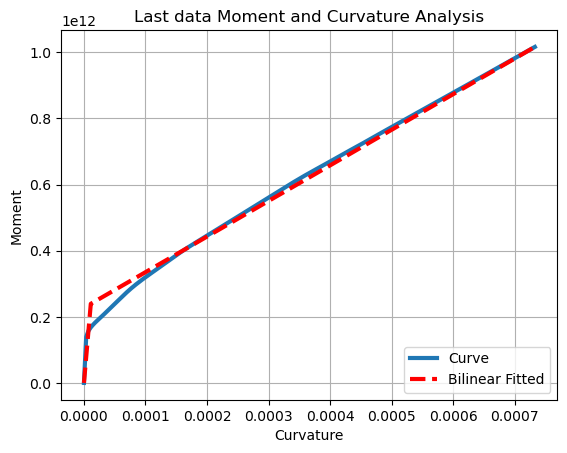

		 Ductility Ratio: 4.2472


In [18]:
CUR = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'CUR', 1, 0, 2)
MOM = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'MOM', 1, 0, 2)
xxc, yyc, _, _, _, _, _ = BILNEAR_CURVE(CUR, -MOM, 2)
xxc = np.abs(xxc); yyc = np.abs(yyc); # ABSOLUTE VALUE
XLABEL = 'Curvature'
YLABEL = 'Moment'
LEGEND01 = 'Curve'
LEGEND02 = 'Bilinear Fitted'
TITLE = 'Last data Moment and Curvature Analysis'
COLOR = 'black'
PLOT_2D(CUR, -MOM, xxc, yyc, _, _, XLABEL, YLABEL, TITLE, LEGEND01, LEGEND02, _, COLOR='black', Z=2) 
print(f'\t\t Ductility Ratio: {yyc[2]/yyc[1]:.4f}')

In [21]:
### ---------------------------------------------------------------------------------
###   Composite Bridge Superstructure Structure Ductility Damage Index Optimization
###                              Newton-Raphson Method
### ---------------------------------------------------------------------------------

X = H # Intial Guess for I Section Height
ESP = 1e-3 # Finite difference derivative Convergence Tolerance
TOLERANCE = 1e-2 # Convergence Tolerance
RESIDUAL = 100 # Convergence Residual 
IT = 0 # Intial Iteration
ITMAX = 100000 # Max. Iteration

g =  9810 # [mm/s^2] Acceleration due to Gravity
DMAX = -10 # [mm] Max. Pushover Incremental Displacement
ND = 50  # NODE NUMBER FOR INCREMENTAL DISPLACEMENT
NUM_NODES = 101 # NUMBER OF NODES IN BEAM ELEMENT
Kef = 98215096.45402119 # [N/mm] Structural Lateral Elastic Stiffness


TARGET_DI = 0.05 # [N] Target Demand Ductility Damage Index
## NEGETIVE DEMAND DUCTILITY DAMAGE INDEX, MEANS YOU LOOK FOR DEMAND DUCTILITY SAFETY INDEX

st = 5 # Sleep Time 

t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(f"Current time (HH:MM:SS): {current_time}\n\n")

Tmax = 0.04 # Maximum Period 
Massef = Kef * (Tmax / (2*np.pi))**2
PCol = Massef / 101 # Mass of each Node (Truss has 62 Nodes)
PColw = PCol * g # Weight of each Node
### FIND THE OPTIMUM VALUE 
while (RESIDUAL > TOLERANCE):
    # X -------------------
    PUSHOVER_ANALYSIS(Length, SideWalk_z, SideWalk_y, SideWalk_C, Deck_z, Deck_y,
                      Box_z, Box_y, tf01, bf, tf02, tw, Z1, Z2, cover,
                      X, DA01, DA02, DA03, PColw, ND, NUM_NODES, DMAX, 0)
    a = DYNAMIC_ANALYSIS(Length, SideWalk_z, SideWalk_y, SideWalk_C, Deck_z, Deck_y,
                         Box_z, Box_y, tf01, bf, tf02, tw, Z1, Z2, cover,
                         X, DA01, DA02, DA03, PCol, PColw, ND, NUM_NODES, DMAX, 0)
    time.sleep(st);# Sleep time
    # STRUCTURE DUCTILITY DAMAGE INDEX
    dispD = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'DTH_DYN', 2, 0, 2) # Reading Disp from Text file - DYNAMIC - NODE 16
    dispP = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'DTH_PUSH', 2, 0, 2) # Reading Disp from Text file - PUSHOVER
    base01 = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'BTH_PUSH_01', 2, 0, 2) # Reading base shear from Text file - PUSHOVER - NODE 1
    base02 = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'BTH_PUSH_101', 2, 0, 2) # Reading base shear from Text file - PUSHOVER - NODE 101
    dispP = np.abs(dispP); baseP = np.abs(base01 + base02); # ABSOLUTE VALUE
    xx, yy, Elastic_ST, Plastic_ST, Tangent_ST, Ductility_Rito, Over_Strength_Factor = BILNEAR_CURVE(dispP, baseP, 30)
    xx = np.abs(xx); yy = np.abs(yy) # ABSOLUTE VALUE
    demand_disp = np.max(np.abs(dispD))# DIPLACEMENT - DYNAMIC
    # WHEN SOFTENING HAPPENED THIS FORMULA HAS ERROR BEACAUSE OF LARGE DISPLACEMENT
    #DI = (demand_disp - xx[1]) / (xx[2] - xx[1])
    DI = (demand_disp - xx[1]) / (DMAX - xx[1]) # DUCTIITY DAMGE INDEX
    F = DI - TARGET_DI
    print('F: ', F)
    print(f'Demand Disp: {demand_disp:.5f} - Current Ductility Damage Index: {DI:.5f}')
    break
    # Xmin -------------------
    XMIN = X - ESP 
    PUSHOVER_ANALYSIS(Length, SideWalk_z, SideWalk_y, SideWalk_C, Deck_z, Deck_y,
                      Box_z, Box_y, tf01, bf, tf02, tw, Z1, Z2, cover,
                      XMIN, DA01, DA02, DA03, PColw, ND, NUM_NODES, DMAX, i)
    a = DYNAMIC_ANALYSIS(Length, SideWalk_z, SideWalk_y, SideWalk_C, Deck_z, Deck_y,
                         Box_z, Box_y, tf01, bf, tf02, tw, Z1, Z2, cover,
                         XMIN, DA01, DA02, DA03, PCol, PColw, ND, NUM_NODES, DMAX, i)
    time.sleep(st);# Sleep time
    # STRUCTURE DUCTILITY DAMAGE INDEX
    dispD = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'DTH_DYN', 2, 0, 2) # Reading Disp from Text file - DYNAMIC - NODE 16
    dispP = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'DTH_PUSH', 2, i, 2) # Reading Disp from Text file - PUSHOVER
    base01 = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'BTH_PUSH_01', 2, i, 2) # Reading base shear from Text file - PUSHOVER - NODE 1
    base02 = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'BTH_PUSH_101', 2, i, 2) # Reading base shear from Text file - PUSHOVER - NODE 101
    dispP = np.abs(dispP); baseP = np.abs(base01 + base02); # ABSOLUTE VALUE
    xx, yy, Elastic_ST, Plastic_ST, Tangent_ST, Ductility_Rito, Over_Strength_Factor = BILNEAR_CURVE(dispP, baseP, 30)
    xx = np.abs(xx); yy = np.abs(yy) # ABSOLUTE VALUE
    demand_disp = np.max(np.abs(dispD))# DIPLACEMENT - DYNAMIC
    # WHEN SOFTENING HAPPENED THIS FORMULA HAS ERROR BEACAUSE OF LARGE DISPLACEMENT
    #DI = (demand_disp - xx[1]) / (xx[2] - xx[1])
    DI_MIN = (demand_disp - xx[1]) / (DMAX - xx[1]) # MINIMUM - DUCTIITY DAMGE INDEX
    Fmin = DI_MIN - TARGET_DI
    print('Fmin: ', Fmin)
    # Xmax -------------------
    XMIN = X + ESP 
    PUSHOVER_ANALYSIS(Length, SideWalk_z, SideWalk_y, SideWalk_C, Deck_z, Deck_y,
                      Box_z, Box_y, tf01, bf, tf02, tw, Z1, Z2, cover,
                      XMAX, DA01, DA02, DA03, PColw, ND, NUM_NODES, DMAX, i)
    a = DYNAMIC_ANALYSIS(Length, SideWalk_z, SideWalk_y, SideWalk_C, Deck_z, Deck_y,
                         Box_z, Box_y, tf01, bf, tf02, tw, Z1, Z2, cover,
                         XMAX, DA01, DA02, DA03, PCol, PColw, ND, NUM_NODES, DMAX, i)
    time.sleep(st);# Sleep time
    # STRUCTURE DUCTILITY DAMAGE INDEX
    dispD = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'DTH_DYN', 2, 0, 2) # Reading Disp from Text file - DYNAMIC - NODE 16
    dispP = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'DTH_PUSH', 2, i, 2) # Reading Disp from Text file - PUSHOVER
    base01 = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'BTH_PUSH_01', 2, i, 2) # Reading base shear from Text file - PUSHOVER - NODE 1
    base02 = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'BTH_PUSH_101', 2, i, 2) # Reading base shear from Text file - PUSHOVER - NODE 101
    dispP = np.abs(dispP); baseP = np.abs(base01 + base02); # ABSOLUTE VALUE
    xx, yy, Elastic_ST, Plastic_ST, Tangent_ST, Ductility_Rito, Over_Strength_Factor = BILNEAR_CURVE(dispP, baseP, 30)
    xx = np.abs(xx); yy = np.abs(yy) # ABSOLUTE VALUE
    demand_disp = np.max(np.abs(dispD))# DIPLACEMENT - DYNAMIC
    # WHEN SOFTENING HAPPENED THIS FORMULA HAS ERROR BEACAUSE OF LARGE DISPLACEMENT
    DI = (demand_disp - xx[1]) / (xx[2] - xx[1])
    #DI_MAX = (demand_disp - xx[1]) / (DMAX - xx[1]) # MAXIMUM - DUCTIITY DAMGE INDEX
    Fmax = DI_MXAX - TARGET_DI
    print('Fmax: ', Fmax)
    # DF -------------------
    DF = (Fmax - Fmin)/(2 * ESP);# Calculate the Finite difference derivative of F
    print('DF: ', DF)
    
    DX = F / DF; # Calculate dx
    RESIDUAL = abs(DX); # Calculate residual
    print('RESIDUAL: ', RESIDUAL,' - I WEB HEIGHT: ', X)
    X -= DX; # update X
    IT += 1; # update iteration
    if IT == ITMAX:
        print("\t\t Iteration reached to Max. Iteration")
        print("\t\t Change ESP and TOLERANCE for better Convergence")
        X = -1
        break;
    if RESIDUAL < TOLERANCE:
        print(f'\t\t Optimum I Beam Web Height:  {X:.4f}')
        print(f'\t\t Iteration Counts:           {IT}')
        print(f'\t\t Convergence Residual:       {RESIDUAL:.10e}')
    #print(X) 
    
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(f"Current time (HH:MM:SS): {current_time}\n\n")        

Current time (HH:MM:SS): 17:55:25


Model Built
1 Pushover Done.
Model Built


WARNING - the 'fullGenLapack' eigen solver is VERY SLOW. Consider using the default eigen solver.WARNING: CTestRelativeNormUnbalance::test() - failed to converge 
after: 1000 iterations
AcceleratedNewton::solveCurrentStep() -The ConvergenceTest object failed in test()
DirectIntegrationAnalysis::analyze() - the Algorithm failed at time 0.01
OpenSees > analyze failed, returned: -3 error flag


NormDispIncr KrylovNewton 0
1 Dynamic Done.
F:  -0.012845471455633785
Demand Disp: 0.51371 - Current Ductility Damage Index: 0.03715
Current time (HH:MM:SS): 18:26:00




###      STRUCTURAL PARAMETERS BASED ON ANALYSIS      ###
 Structure Elastic Stiffness :      64849075.24
 Structure Plastic Stiffness :      37884855.00
 Structure Tangent Stiffness :      35300896.06
 Structure Ductility Ratio :        11.44
 Structure Over Strength Factor:    6.68
 Structure Yield Displacement:      0.92
 Structure Ultimate Displacement:   10.51
 Structure Demand Displacement:     0.51
 Structure Ductility Damage index:  3.72 %


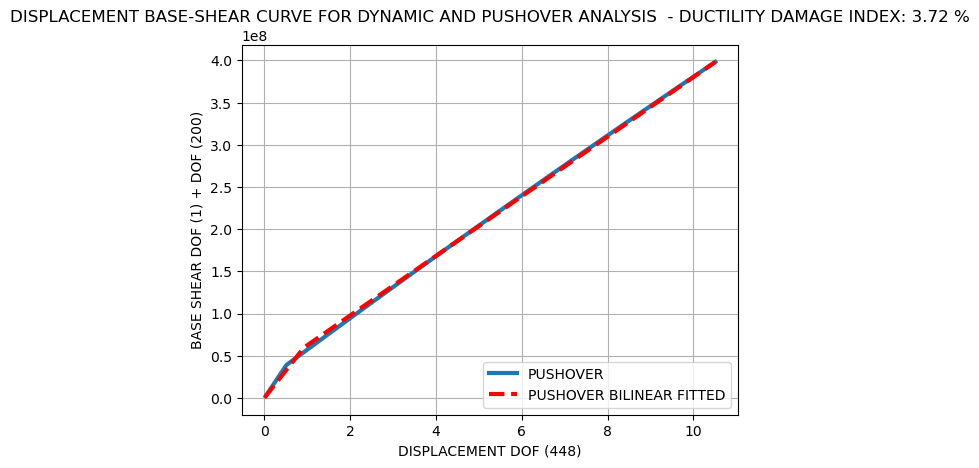

In [23]:
print('###      STRUCTURAL PARAMETERS BASED ON ANALYSIS      ###')
print('=========================================================')
print(f' Structure Elastic Stiffness :      {Elastic_ST:.2f}')
print(f' Structure Plastic Stiffness :      {Plastic_ST:.2f}')
print(f' Structure Tangent Stiffness :      {Tangent_ST:.2f}')
print(f' Structure Ductility Ratio :        {Ductility_Rito:.2f}')
print(f' Structure Over Strength Factor:    {Over_Strength_Factor:.2f}')
print(f' Structure Yield Displacement:      {xx[1]:.2f}')
print(f' Structure Ultimate Displacement:   {xx[2]:.2f}')
print(f' Structure Demand Displacement:     {demand_disp:.2f}')
print(f' Structure Ductility Damage index:  {100* DI:.2f} %')
dispD = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'DTH_DYN', 2, 0, 2) # Reading Disp from Text file - DYNAMIC - NODE 16
dispP = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'DTH_PUSH', 2, 0, 2) # Reading Disp from Text file - PUSHOVER
base01 = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'BTH_PUSH_01', 2, 0, 2) # Reading base shear from Text file - PUSHOVER - NODE 1
base02 = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'BTH_PUSH_101', 2, 0, 2) # Reading base shear from Text file - PUSHOVER - NODE 101
dispP = np.abs(dispP); baseP = np.abs(base01 + base02); # ABSOLUTE VALUE
xx, yy, Elastic_ST, Plastic_ST, Tangent_ST, Ductility_Rito, Over_Strength_Factor = BILNEAR_CURVE(dispP, baseP, 30)
xx = np.abs(xx); yy = np.abs(yy) # ABSOLUTE VALUE
demand_disp = np.max(np.abs(dispD))# DIPLACEMENT - DYNAMIC
XLABEL = 'DISPLACEMENT DOF (448)'
YLABEL = 'BASE SHEAR DOF (1) + DOF (200)'
TITLE = f'DISPLACEMENT BASE-SHEAR CURVE FOR DYNAMIC AND PUSHOVER ANALYSIS  - DUCTILITY DAMAGE INDEX: {100* DI:.2f} %'
LEGEND01 = 'PUSHOVER'
LEGEND02 = 'PUSHOVER BILINEAR FITTED'
LEGEND03 = 'DYNAMIC'
COLOR = 'blue'
PLOT_2D(dispP, baseP, xx, yy, _, _, XLABEL, YLABEL, TITLE, LEGEND01, LEGEND02, LEGEND03, COLOR, Z=2)

In [19]:
### ---------------------------------------------------------------------------------
###   Composite Bridge Superstructure Structure Ductility Damage Index Optimization
###                               Genetic Algorithm Method
### ---------------------------------------------------------------------------------


import numpy as np
import time
import random

# Parameters
POP_SIZE = 50  # Population size
GENS = 100  # Number of generations
MUT_RATE = 0.1  # Mutation rate
CROSS_RATE = 0.7  # Crossover rate


X = H # Initial Guess for I Section Height
g = 9810  # [mm/s^2]
DMAX = -10  # [mm] Max. Pushover Incremental Displacement
ND = 50  # NODE NUMBER FOR INCREMENTAL DISPLACEMENT
NUM_NODES = 101  # NUMBER OF NODES IN BEAM ELEMENT
Kef = 98215096.45402119  # [N/mm] Structural Lateral Elastic Stiffness
TARGET_DI = 0.05  # [N] Target Demand Ductility Damage Index
st = 5  # Sleep Time

Tmax = 0.04  # Maximum Period
Massef = Kef * (Tmax / (2 * np.pi)) ** 2
PCol = Massef / 101  # Mass of each Node (Truss has 62 Nodes)
PColw = PCol * g  # Weight of each Node

# Fitness function
def fitness(X):
    PUSHOVER_ANALYSIS(Length, SideWalk_z, SideWalk_y, SideWalk_C, Deck_z, Deck_y,
                      Box_z, Box_y, tf01, bf, tf02, tw, Z1, Z2, cover,
                      X, DA01, DA02, DA03, PColw, ND, NUM_NODES, DMAX, 0)
    a = DYNAMIC_ANALYSIS(Length, SideWalk_z, SideWalk_y, SideWalk_C, Deck_z, Deck_y,
                         Box_z, Box_y, tf01, bf, tf02, tw, Z1, Z2, cover,
                         X, DA01, DA02, DA03, PCol, PColw, ND, NUM_NODES, DMAX, 0)
    time.sleep(st)
    dispD = OUTPUT_SECOND_COLUMN(FOLDER_NAME, 'DTH_DYN', 2, 0, 2)
    dispP = OUTPUT_SECOND_COLUMN(FOLDER_NAME, 'DTH_PUSH', 2, 0, 2)
    base01 = OUTPUT_SECOND_COLUMN(FOLDER_NAME, 'BTH_PUSH_01', 2, 0, 2)
    base02 = OUTPUT_SECOND_COLUMN(FOLDER_NAME, 'BTH_PUSH_101', 2, 0, 2)
    dispP = np.abs(dispP)
    baseP = np.abs(base01 + base02)
    xx, yy, Elastic_ST, Plastic_ST, Tangent_ST, Ductility_Rito, Over_Strength_Factor = BILNEAR_CURVE(dispP, baseP, 30)
    xx = np.abs(xx)
    yy = np.abs(yy)
    demand_disp = np.max(np.abs(dispD))
    DI = (demand_disp - xx[1]) / (xx[] - xx[1])
    F = DI - TARGET_DI
    return -abs(F)

# Initialize population
population = [random.uniform(0.1, 2.0) for _ in range(POP_SIZE)]

t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(f"Current time (HH:MM:SS): {current_time}\n\n")

# Genetic Algorithm
for gen in range(GENS):
    print('Iteration: ', gen+1)
    fitness_scores = [fitness(ind) for ind in population]
    sorted_population = [x for _, x in sorted(zip(fitness_scores, population), reverse=True)]
    new_population = sorted_population[:POP_SIZE // 2]

    while len(new_population) < POP_SIZE:
        if random.random() < CROSS_RATE:
            parent1, parent2 = random.sample(new_population[:POP_SIZE // 2], 2)
            child = (parent1 + parent2) / 2
        else:
            child = random.choice(new_population[:POP_SIZE // 2])
        
        if random.random() < MUT_RATE:
            child += random.uniform(-0.1, 0.1)
        
        new_population.append(child)
    
    population = new_population

best_solution = max(population, key=fitness)
print(f'Optimum I Section Beam Web Height: {best_solution:.4f}')

t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(f"Current time (HH:MM:SS): {current_time}\n\n")

Iteration:  1
Model Built
1 Pushover Done.
Model Built


WARNING - the 'fullGenLapack' eigen solver is VERY SLOW. Consider using the default eigen solver.WARNING: CTestRelativeNormUnbalance::test() - failed to converge 
after: 1000 iterations
AcceleratedNewton::solveCurrentStep() -The ConvergenceTest object failed in test()
DirectIntegrationAnalysis::analyze() - the Algorithm failed at time 0.01
OpenSees > analyze failed, returned: -3 error flag


NormDispIncr KrylovNewton 0
1 Dynamic Done.
Model Built
1 Pushover Done.
Model Built


after: 1000 iterations
AcceleratedNewton::solveCurrentStep() -The ConvergenceTest object failed in test()
DirectIntegrationAnalysis::analyze() - the Algorithm failed at time 0.01
OpenSees > analyze failed, returned: -3 error flag


NormDispIncr KrylovNewton 0
1 Dynamic Done.
Model Built
1 Pushover Done.
Model Built


after: 1000 iterations
AcceleratedNewton::solveCurrentStep() -The ConvergenceTest object failed in test()
DirectIntegrationAnalysis::analyze() - the Algorithm failed at time 0.01
OpenSees > analyze failed, returned: -3 error flag


NormDispIncr KrylovNewton 0
1 Dynamic Done.
Model Built
1 Pushover Done.
Model Built


after: 1000 iterations
AcceleratedNewton::solveCurrentStep() -The ConvergenceTest object failed in test()
DirectIntegrationAnalysis::analyze() - the Algorithm failed at time 0.01
OpenSees > analyze failed, returned: -3 error flag


NormDispIncr KrylovNewton 0
1 Dynamic Done.
Model Built
1 Pushover Done.
Model Built


after: 1000 iterations
AcceleratedNewton::solveCurrentStep() -The ConvergenceTest object failed in test()
DirectIntegrationAnalysis::analyze() - the Algorithm failed at time 0.01
OpenSees > analyze failed, returned: -3 error flag


NormDispIncr KrylovNewton 0
1 Dynamic Done.
Model Built
1 Pushover Done.
Model Built


after: 1000 iterations
AcceleratedNewton::solveCurrentStep() -The ConvergenceTest object failed in test()
DirectIntegrationAnalysis::analyze() - the Algorithm failed at time 0.01
OpenSees > analyze failed, returned: -3 error flag


NormDispIncr KrylovNewton 0
1 Dynamic Done.
Model Built
1 Pushover Done.
Model Built


after: 1000 iterations
AcceleratedNewton::solveCurrentStep() -The ConvergenceTest object failed in test()
DirectIntegrationAnalysis::analyze() - the Algorithm failed at time 0.01
OpenSees > analyze failed, returned: -3 error flag


NormDispIncr KrylovNewton 0
1 Dynamic Done.
Model Built
1 Pushover Done.
Model Built


after: 1000 iterations
AcceleratedNewton::solveCurrentStep() -The ConvergenceTest object failed in test()
DirectIntegrationAnalysis::analyze() - the Algorithm failed at time 0.01
OpenSees > analyze failed, returned: -3 error flag


NormDispIncr KrylovNewton 0
1 Dynamic Done.
Model Built
1 Pushover Done.
Model Built


after: 1000 iterations
AcceleratedNewton::solveCurrentStep() -The ConvergenceTest object failed in test()
DirectIntegrationAnalysis::analyze() - the Algorithm failed at time 0.01
OpenSees > analyze failed, returned: -3 error flag


NormDispIncr KrylovNewton 0
1 Dynamic Done.
Model Built
1 Pushover Done.
Model Built


after: 1000 iterations
AcceleratedNewton::solveCurrentStep() -The ConvergenceTest object failed in test()
DirectIntegrationAnalysis::analyze() - the Algorithm failed at time 0.01
OpenSees > analyze failed, returned: -3 error flag


NormDispIncr KrylovNewton 0
1 Dynamic Done.
Model Built
1 Pushover Done.
Model Built


after: 1000 iterations
AcceleratedNewton::solveCurrentStep() -The ConvergenceTest object failed in test()
DirectIntegrationAnalysis::analyze() - the Algorithm failed at time 0.01
OpenSees > analyze failed, returned: -3 error flag


NormDispIncr KrylovNewton 0
1 Dynamic Done.
Model Built
1 Pushover Done.
Model Built


after: 1000 iterations
AcceleratedNewton::solveCurrentStep() -The ConvergenceTest object failed in test()
DirectIntegrationAnalysis::analyze() - the Algorithm failed at time 0.01
OpenSees > analyze failed, returned: -3 error flag


NormDispIncr KrylovNewton 0
1 Dynamic Done.
Model Built
1 Pushover Done.
Model Built


after: 1000 iterations
AcceleratedNewton::solveCurrentStep() -The ConvergenceTest object failed in test()
DirectIntegrationAnalysis::analyze() - the Algorithm failed at time 0.01
OpenSees > analyze failed, returned: -3 error flag


NormDispIncr KrylovNewton 0
1 Dynamic Done.
Model Built
1 Pushover Done.
Model Built


after: 1000 iterations
AcceleratedNewton::solveCurrentStep() -The ConvergenceTest object failed in test()
DirectIntegrationAnalysis::analyze() - the Algorithm failed at time 0.01
OpenSees > analyze failed, returned: -3 error flag


NormDispIncr KrylovNewton 0
1 Dynamic Done.
Model Built
1 Pushover Done.
Model Built


after: 1000 iterations
AcceleratedNewton::solveCurrentStep() -The ConvergenceTest object failed in test()
DirectIntegrationAnalysis::analyze() - the Algorithm failed at time 0.01
OpenSees > analyze failed, returned: -3 error flag


NormDispIncr KrylovNewton 0
1 Dynamic Done.
Model Built
1 Pushover Done.
Model Built


after: 1000 iterations
AcceleratedNewton::solveCurrentStep() -The ConvergenceTest object failed in test()
DirectIntegrationAnalysis::analyze() - the Algorithm failed at time 0.01
OpenSees > analyze failed, returned: -3 error flag


NormDispIncr KrylovNewton 0
1 Dynamic Done.
Model Built
1 Pushover Done.
Model Built


after: 1000 iterations
AcceleratedNewton::solveCurrentStep() -The ConvergenceTest object failed in test()
DirectIntegrationAnalysis::analyze() - the Algorithm failed at time 0.01
OpenSees > analyze failed, returned: -3 error flag


NormDispIncr KrylovNewton 0
1 Dynamic Done.
Model Built
1 Pushover Done.
Model Built


after: 1000 iterations
AcceleratedNewton::solveCurrentStep() -The ConvergenceTest object failed in test()
DirectIntegrationAnalysis::analyze() - the Algorithm failed at time 0.01
OpenSees > analyze failed, returned: -3 error flag


NormDispIncr KrylovNewton 0
1 Dynamic Done.
Model Built
1 Pushover Done.
Model Built


after: 1000 iterations
AcceleratedNewton::solveCurrentStep() -The ConvergenceTest object failed in test()
DirectIntegrationAnalysis::analyze() - the Algorithm failed at time 0.01
OpenSees > analyze failed, returned: -3 error flag


NormDispIncr KrylovNewton 0
1 Dynamic Done.
Model Built
1 Pushover Done.
Model Built


after: 1000 iterations
AcceleratedNewton::solveCurrentStep() -The ConvergenceTest object failed in test()
DirectIntegrationAnalysis::analyze() - the Algorithm failed at time 0.01
OpenSees > analyze failed, returned: -3 error flag


NormDispIncr KrylovNewton 0
1 Dynamic Done.
Model Built
1 Pushover Done.
Model Built


after: 1000 iterations
AcceleratedNewton::solveCurrentStep() -The ConvergenceTest object failed in test()
DirectIntegrationAnalysis::analyze() - the Algorithm failed at time 0.01
OpenSees > analyze failed, returned: -3 error flag


KeyboardInterrupt: 

In [ ]:
### ---------------------------------------------------------------------------------
###   Composite Bridge Superstructure Structure Ductility Damage Index Optimization
###                                Firefly Algorithm Method
### ---------------------------------------------------------------------------------

import numpy as np
import time

# Firefly Algorithm Parameters
n = 25  # Number of fireflies
alpha = 0.5  # Randomness parameter
beta0 = 1  # Attractiveness parameter
gamma = 1  # Absorption coefficient
max_gen = 1000  # Maximum number of generations

# Problem Parameters
X = np.random.rand(n) * 100  # Initial guess for I Section Height
g = 9810  # [mm/s^2]
DMAX = -10  # [mm] Max. Pushover Incremental Displacement
ND = 50  # NODE NUMBER FOR INCREMENTAL DISPLACEMENT
NUM_NODES = 101  # NUMBER OF NODES IN BEAM ELEMENT
Kef = 98215096.45402119  # [N/mm] Structural Lateral Elastic Stiffness
TARGET_DI = 0.05  # [N] Target Demand Ductility Damage Index
st = 5  # Sleep Time

Tmax = 0.04  # Maximum Period
Massef = Kef * (Tmax / (2 * np.pi)) ** 2
PCol = Massef / 101  # Mass of each Node (Truss has 62 Nodes)
PColw = PCol * g  # Weight of each Node

# Objective Function
def objective(X):
    PUSHOVER_ANALYSIS(Length, SideWalk_z, SideWalk_y, SideWalk_C, Deck_z, Deck_y,
                      Box_z, Box_y, tf01, bf, tf02, tw, Z1, Z2, cover,
                      X, DA01, DA02, DA03, PColw, ND, NUM_NODES, DMAX, 0)
    a = DYNAMIC_ANALYSIS(Length, SideWalk_z, SideWalk_y, SideWalk_C, Deck_z, Deck_y,
                         Box_z, Box_y, tf01, bf, tf02, tw, Z1, Z2, cover,
                         X, DA01, DA02, DA03, PCol, PColw, ND, NUM_NODES, DMAX, 0)
    time.sleep(st)
    dispD = OUTPUT_SECOND_COLUMN(FOLDER_NAME, 'DTH_DYN', 2, 0, 2)
    dispP = OUTPUT_SECOND_COLUMN(FOLDER_NAME, 'DTH_PUSH', 2, 0, 2)
    base01 = OUTPUT_SECOND_COLUMN(FOLDER_NAME, 'BTH_PUSH_01', 2, 0, 2)
    base02 = OUTPUT_SECOND_COLUMN(FOLDER_NAME, 'BTH_PUSH_101', 2, 0, 2)
    dispP = np.abs(dispP)
    baseP = np.abs(base01 + base02)
    xx, yy, Elastic_ST, Plastic_ST, Tangent_ST, Ductility_Rito, Over_Strength_Factor = BILNEAR_CURVE(dispP, baseP, 30)
    xx = np.abs(xx)
    yy = np.abs(yy)
    demand_disp = np.max(np.abs(dispD))
    DI = (demand_disp - xx[1]) / (DMAX - xx[1])
    F = DI - TARGET_DI
    return F

t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(f"Current time (HH:MM:SS): {current_time}\n\n")

# Firefly Algorithm
for gen in range(max_gen):
    for i in range(n):
        for j in range(n):
            if objective(X[j]) < objective(X[i]):
                r = np.linalg.norm(X[i] - X[j])
                beta = beta0 * np.exp(-gamma * r ** 2)
                X[i] = X[i] + beta * (X[j] - X[i]) + alpha * (np.random.rand() - 0.5)
                X[i] = np.clip(X[i], 0, 100)  # Ensure X stays within bounds

    best_firefly = np.argmin([objective(x) for x in X])
    print(f'Generation {gen + 1}, Best Solution: {X[best_firefly]}, Objective: {objective(X[best_firefly])}')

t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(f"Current time (HH:MM:SS): {current_time}\n\n")

In [ ]:
### ---------------------------------------------------------------------------------
###   Composite Bridge Superstructure Structure Ductility Damage Index Optimization
###                            Ant colony Algorithm Method
### ---------------------------------------------------------------------------------

import numpy as np
import time

# Parameters
X = H  # Initial Guess for I Section Height
ESP = 1e-3  # Convergence Tolerance for Finite Difference Derivative
TOLERANCE = 1e-2  # Convergence Tolerance
RESIDUAL = 100  # Convergence Residual
IT = 0  # Initial Iteration
ITMAX = 100000  # Max. Iteration

g = 9810  # [mm/s^2]
DMAX = -10  # [mm] Max. Pushover Incremental Displacement
ND = 50  # Node Number for Incremental Displacement
NUM_NODES = 101  # Number of Nodes in Beam Element
Kef = 98215096.45402119  # [N/mm] Structural Lateral Elastic Stiffness

TARGET_DI = 0.05  # Target Demand Ductility Damage Index
st = 5  # Sleep Time

Tmax = 0.04  # Maximum Period
Massef = Kef * (Tmax / (2 * np.pi)) ** 2
PCol = Massef / 101  # Mass of each Node
PColw = PCol * g  # Weight of each Node

# Ant Colony Parameters
num_ants = 50
num_iterations = 100
pheromone_evaporation_rate = 0.1
pheromone_intensity = 1.0
pheromone = np.ones((num_ants, NUM_NODES))

def objective_function(X):
    PUSHOVER_ANALYSIS(Length, SideWalk_z, SideWalk_y, SideWalk_C, Deck_z, Deck_y,
                      Box_z, Box_y, tf01, bf, tf02, tw, Z1, Z2, cover,
                      X, DA01, DA02, DA03, PColw, ND, NUM_NODES, DMAX, 0)
    a = DYNAMIC_ANALYSIS(Length, SideWalk_z, SideWalk_y, SideWalk_C, Deck_z, Deck_y,
                         Box_z, Box_y, tf01, bf, tf02, tw, Z1, Z2, cover,
                         X, DA01, DA02, DA03, PCol, PColw, ND, NUM_NODES, DMAX, 0)
    time.sleep(st)
    dispD = OUTPUT_SECOND_COLUMN(FOLDER_NAME, 'DTH_DYN', 2, 0, 2)
    dispP = OUTPUT_SECOND_COLUMN(FOLDER_NAME, 'DTH_PUSH', 2, 0, 2)
    base01 = OUTPUT_SECOND_COLUMN(FOLDER_NAME, 'BTH_PUSH_01', 2, 0, 2)
    base02 = OUTPUT_SECOND_COLUMN(FOLDER_NAME, 'BTH_PUSH_101', 2, 0, 2)
    dispP = np.abs(dispP)
    baseP = np.abs(base01 + base02)
    xx, yy, Elastic_ST, Plastic_ST, Tangent_ST, Ductility_Rito, Over_Strength_Factor = BILNEAR_CURVE(dispP, baseP, 30)
    xx = np.abs(xx)
    yy = np.abs(yy)
    demand_disp = np.max(np.abs(dispD))
    DI = (demand_disp - xx[1]) / (DMAX - xx[1])
    return np.abs(DI - TARGET_DI)

def update_pheromone(pheromone, ants, best_ant):
    pheromone *= (1 - pheromone_evaporation_rate)
    for ant in ants:
        for node in ant:
            pheromone[node] += pheromone_intensity / objective_function(node)
    for node in best_ant:
        pheromone[node] += pheromone_intensity / objective_function(node)

t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(f"Current time (HH:MM:SS): {current_time}\n\n")

# Ant Colony Optimization
best_solution = None
best_objective_value = float('inf')

for iteration in range(num_iterations):
    ants = []
    for ant in range(num_ants):
        solution = []
        for node in range(NUM_NODES):
            if np.random.rand() < pheromone[ant, node]:
                solution.append(node)
        ants.append(solution)
    
    for ant in ants:
        objective_value = objective_function(ant)
        if objective_value < best_objective_value:
            best_solution = ant
            best_objective_value = objective_value
    
    update_pheromone(pheromone, ants, best_solution)
    
    if best_objective_value < TOLERANCE:
        break

print(f'Optimum I Beam Web Height: {best_solution}')
print(f'Best Objective Value: {best_objective_value}')
print(f'Iterations: {iteration + 1}')

t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(f"Current time (HH:MM:SS): {current_time}\n\n")

In [ ]:
### ---------------------------------------------------------------------------------
###   Composite Bridge Superstructure Structure Ductility Damage Index Optimization
###                          Artificial Bee Colony Algorithm Method
### ---------------------------------------------------------------------------------

import numpy as np
import time

# Parameters
X = H  # Initial Guess for I Section Height
ESP = 1e-3  # Finite difference derivative Convergence Tolerance
TOLERANCE = 1e-2  # Convergence Tolerance
RESIDUAL = 100  # Convergence Residual 
IT = 0  # Initial Iteration
ITMAX = 100000  # Max. Iteration

g = 9810  # [mm/s^2]
DMAX = -10  # [mm] Max. Pushover Incremental Displacement
ND = 50  # NODE NUMBER FOR INCREMENTAL DISPLACEMENT
NUM_NODES = 101  # NUMBER OF NODES IN BEAM ELEMENT
Kef = 98215096.45402119  # [N/mm] Structural Lateral Elastic Stiffness

TARGET_DI = 0.05  # [N] Target Demand Ductility Damage Index
# NEGATIVE DEMAND DUCTILITY DAMAGE INDEX, MEANS YOU LOOK FOR DEMAND DUCTILITY SAFETY INDEX

st = 5  # Sleep Time 

# Current Time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(f"Current time (HH:MM:SS): {current_time}\n\n")

Tmax = 0.04  # Maximum Period 
Massef = Kef * (Tmax / (2 * np.pi))**2
PCol = Massef / 101  # Mass of each Node (Truss has 62 Nodes)
PColw = PCol * g  # Weight of each Node

# Artificial Bee Colony Parameters
NP = 50  # Number of food sources (population size)
limit = 100  # Limit for abandonment
maxCycle = 1000  # Maximum number of cycles

# Initialize population
population = np.random.uniform(low=0.1, high=2.0, size=NP)
fitness = np.zeros(NP)
trial = np.zeros(NP)

def evaluate_fitness(X):
    PUSHOVER_ANALYSIS(Length, SideWalk_z, SideWalk_y, SideWalk_C, Deck_z, Deck_y,
                      Box_z, Box_y, tf01, bf, tf02, tw, Z1, Z2, cover,
                      X, DA01, DA02, DA03, PColw, ND, NUM_NODES, DMAX, 0)
    a = DYNAMIC_ANALYSIS(Length, SideWalk_z, SideWalk_y, SideWalk_C, Deck_z, Deck_y,
                         Box_z, Box_y, tf01, bf, tf02, tw, Z1, Z2, cover,
                         X, DA01, DA02, DA03, PCol, PColw, ND, NUM_NODES, DMAX, 0)
    time.sleep(st)
    dispD = OUTPUT_SECOND_COLUMN(FOLDER_NAME, 'DTH_DYN', 2, 0, 2)
    dispP = OUTPUT_SECOND_COLUMN(FOLDER_NAME, 'DTH_PUSH', 2, 0, 2)
    base01 = OUTPUT_SECOND_COLUMN(FOLDER_NAME, 'BTH_PUSH_01', 2, 0, 2)
    base02 = OUTPUT_SECOND_COLUMN(FOLDER_NAME, 'BTH_PUSH_101', 2, 0, 2)
    dispP = np.abs(dispP)
    baseP = np.abs(base01 + base02)
    xx, yy, Elastic_ST, Plastic_ST, Tangent_ST, Ductility_Rito, Over_Strength_Factor = BILNEAR_CURVE(dispP, baseP, 30)
    xx = np.abs(xx)
    yy = np.abs(yy)
    demand_disp = np.max(np.abs(dispD))
    DI = (demand_disp - xx[1]) / (DMAX - xx[1])
    F = DI - TARGET_DI
    return F

# Evaluate initial population
for i in range(NP):
    fitness[i] = evaluate_fitness(population[i])

# Main ABC algorithm loop
for cycle in range(maxCycle):
    # Employed Bee Phase
    for i in range(NP):
        k = np.random.randint(0, NP)
        while k == i:
            k = np.random.randint(0, NP)
        phi = np.random.uniform(-1, 1)
        new_solution = population[i] + phi * (population[i] - population[k])
        new_fitness = evaluate_fitness(new_solution)
        if new_fitness < fitness[i]:
            population[i] = new_solution
            fitness[i] = new_fitness
            trial[i] = 0
        else:
            trial[i] += 1

    # Onlooker Bee Phase
    fitness_prob = fitness / np.sum(fitness)
    for i in range(NP):
        if np.random.rand() < fitness_prob[i]:
            k = np.random.randint(0, NP)
            while k == i:
                k = np.random.randint(0, NP)
            phi = np.random.uniform(-1, 1)
            new_solution = population[i] + phi * (population[i] - population[k])
            new_fitness = evaluate_fitness(new_solution)
            if new_fitness < fitness[i]:
                population[i] = new_solution
                fitness[i] = new_fitness
                trial[i] = 0
            else:
                trial[i] += 1

    # Scout Bee Phase
    for i in range(NP):
        if trial[i] > limit:
            population[i] = np.random.uniform(low=0.1, high=2.0)
            fitness[i] = evaluate_fitness(population[i])
            trial[i] = 0

    # Check for convergence
    best_fitness = np.min(fitness)
    best_solution = population[np.argmin(fitness)]
    if best_fitness < TOLERANCE:
        print(f'\t\t Optimum I Beam Web Height:  {best_solution:.4f}')
        print(f'\t\t Iteration Counts:           {cycle}')
        print(f'\t\t Convergence Residual:       {best_fitness:.10e}')
        break

t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(f"Current time (HH:MM:SS): {current_time}\n\n")

In [ ]:
### ---------------------------------------------------------------------------------
###   Composite Bridge Superstructure Structure Ductility Damage Index Optimization
###                          Particle Swarm Algorithm Method
### ---------------------------------------------------------------------------------

import numpy as np
import time

# PSO Parameters
num_particles = 30
num_iterations = 1000
w = 0.5  # Inertia weight
c1 = 1.5  # Cognitive (particle) weight
c2 = 1.5  # Social (swarm) weight

# Problem Parameters
X = np.random.uniform(low=0.1, high=1.0, size=num_particles)  # Initial guess for I Section Height
ESP = 1e-3  # Finite difference derivative Convergence Tolerance
TOLERANCE = 1e-2  # Convergence Tolerance
RESIDUAL = 100  # Convergence Residual
IT = 0  # Initial Iteration
ITMAX = 100000  # Max. Iteration

g = 9810  # [mm/s^2]
DMAX = -10  # [mm] Max. Pushover Incremental Displacement
ND = 50  # NODE NUMBER FOR INCREMENTAL DISPLACEMENT
NUM_NODES = 101  # NUMBER OF NODES IN BEAM ELEMENT
Kef = 98215096.45402119  # [N/mm] Structural Lateral Elastic Stiffness

TARGET_DI = 0.05  # [N] Target Demand Ductility Damage Index
# NEGATIVE DEMAND DUCTILITY DAMAGE INDEX, MEANS YOU LOOK FOR DEMAND DUCTILITY SAFETY INDEX

st = 5  # Sleep Time

t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(f"Current time (HH:MM:SS): {current_time}\n\n")

Tmax = 0.04  # Maximum Period
Massef = Kef * (Tmax / (2 * np.pi)) ** 2
PCol = Massef / 101  # Mass of each Node (Truss has 62 Nodes)
PColw = PCol * g  # Weight of each Node

# PSO Initialization
particle_positions = np.random.uniform(low=0.1, high=1.0, size=num_particles)
particle_velocities = np.zeros(num_particles)
personal_best_positions = np.copy(particle_positions)
personal_best_scores = np.full(num_particles, np.inf)
global_best_position = None
global_best_score = np.inf

def objective_function(X):
    # Placeholder for the actual objective function
    # Replace with the actual function to calculate the Ductility Damage Index
    return np.random.random()  # Random value for demonstration

# PSO Algorithm
for iteration in range(num_iterations):
    for i in range(num_particles):
        current_position = particle_positions[i]
        current_score = objective_function(current_position)
        
        if current_score < personal_best_scores[i]:
            personal_best_scores[i] = current_score
            personal_best_positions[i] = current_position
        
        if current_score < global_best_score:
            global_best_score = current_score
            global_best_position = current_position
    
    for i in range(num_particles):
        r1 = np.random.random()
        r2 = np.random.random()
        particle_velocities[i] = (w * particle_velocities[i] +
                                  c1 * r1 * (personal_best_positions[i] - particle_positions[i]) +
                                  c2 * r2 * (global_best_position - particle_positions[i]))
        particle_positions[i] += particle_velocities[i]
    
    if global_best_score < TOLERANCE:
        break

print(f'Optimum I Beam Web Height: {global_best_position:.4f}')
print(f'Global Best Score: {global_best_score:.10e}')
print(f'Iteration Counts: {iteration + 1}')

t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(f"Current time (HH:MM:SS): {current_time}\n\n")

In [ ]:
```python
### ---------------------------------------------------------------------------------
###   Composite Bridge Superstructure Structure Ductility Damage Index Optimization
###                     Differential Evolution Algorithm Method
### ---------------------------------------------------------------------------------

import numpy as np
import time
from scipy.optimize import differential_evolution

# Constants
ESP = 1e-3  # Finite difference derivative Convergence Tolerance
TOLERANCE = 1e-2  # Convergence Tolerance
g = 9810  # [mm/s^2]
DMAX = -10  # [mm] Max. Pushover Incremental Displacement
ND = 50  # NODE NUMBER FOR INCREMENTAL DISPLACEMENT
NUM_NODES = 101  # NUMBER OF NODES IN BEAM ELEMENT
Kef = 98215096.45402119  # [N/mm] Structural Lateral Elastic Stiffness
TARGET_DI = 0.05  # [N] Target Demand Ductility Damage Index
st = 5  # Sleep Time

# Derived constants
Tmax = 0.04  # Maximum Period
Massef = Kef * (Tmax / (2 * np.pi)) ** 2
PCol = Massef / 101  # Mass of each Node (Truss has 62 Nodes)
PColw = PCol * g  # Weight of each Node

# Objective function for Differential Evolution
def objective(X):
    PUSHOVER_ANALYSIS(Length, SideWalk_z, SideWalk_y, SideWalk_C, Deck_z, Deck_y,
                      Box_z, Box_y, tf01, bf, tf02, tw, Z1, Z2, cover,
                      X, DA01, DA02, DA03, PColw, ND, NUM_NODES, DMAX, 0)
    DYNAMIC_ANALYSIS(Length, SideWalk_z, SideWalk_y, SideWalk_C, Deck_z, Deck_y,
                     Box_z, Box_y, tf01, bf, tf02, tw, Z1, Z2, cover,
                     X, DA01, DA02, DA03, PCol, PColw, ND, NUM_NODES, DMAX, 0)
    time.sleep(st)
    
    dispD = OUTPUT_SECOND_COLUMN(FOLDER_NAME, 'DTH_DYN', 2, 0, 2)
    dispP = OUTPUT_SECOND_COLUMN(FOLDER_NAME, 'DTH_PUSH', 2, 0, 2)
    base01 = OUTPUT_SECOND_COLUMN(FOLDER_NAME, 'BTH_PUSH_01', 2, 0, 2)
    base02 = OUTPUT_SECOND_COLUMN(FOLDER_NAME, 'BTH_PUSH_101', 2, 0, 2)
    
    dispP = np.abs(dispP)
    baseP = np.abs(base01 + base02)
    xx, yy, Elastic_ST, Plastic_ST, Tangent_ST, Ductility_Rito, Over_Strength_Factor = BILNEAR_CURVE(dispP, baseP, 30)
    xx = np.abs(xx)
    yy = np.abs(yy)
    
    demand_disp = np.max(np.abs(dispD))
    DI = (demand_disp - xx[1]) / (DMAX - xx[1])
    F = DI - TARGET_DI
    
    return np.abs(F)

t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(f"Current time (HH:MM:SS): {current_time}\n\n")

# Differential Evolution Optimization
bounds = [(0.1, 2.0)]  # Example bounds for X
result = differential_evolution(objective, bounds, tol=TOLERANCE, maxiter=1000)

# Output results
X_opt = result.x[0]
print(f'Optimum I Beam Web Height: {X_opt:.4f}')
print(f'Function Value: {result.fun:.10e}')
print(f'Iterations: {result.nit}')
print(f'Convergence Message: {result.message}')

t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(f"Current time (HH:MM:SS): {current_time}\n\n")

In [ ]:
### ---------------------------------------------------------------------------------
###   Composite Bridge Superstructure Structure Ductility Damage Index Optimization
###                Artificial Neural Networks Algorithm Method
### ---------------------------------------------------------------------------------


import numpy as np
import time
from keras.models import Sequential
from keras.layers import Dense

# Initial Parameters
X = H  # Initial Guess for I Section Height
ESP = 1e-3  # Finite difference derivative Convergence Tolerance
TOLERANCE = 1e-2  # Convergence Tolerance
RESIDUAL = 100  # Convergence Residual
IT = 0  # Initial Iteration
ITMAX = 100000  # Max. Iteration

g = 9810  # [mm/s^2]
DMAX = -10  # [mm] Max. Pushover Incremental Displacement
ND = 50  # NODE NUMBER FOR INCREMENTAL DISPLACEMENT
NUM_NODES = 101  # NUMBER OF NODES IN BEAM ELEMENT
Kef = 98215096.45402119  # [N/mm] Structural Lateral Elastic Stiffness

TARGET_DI = 0.05  # [N] Target Demand Ductility Damage Index
# NEGATIVE DEMAND DUCTILITY DAMAGE INDEX, MEANS YOU LOOK FOR DEMAND DUCTILITY SAFETY INDEX

st = 5  # Sleep Time

# Time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(f"Current time (HH:MM:SS): {current_time}\n\n")

Tmax = 0.04  # Maximum Period
Massef = Kef * (Tmax / (2 * np.pi)) ** 2
PCol = Massef / 101  # Mass of each Node (Truss has 62 Nodes)
PColw = PCol * g  # Weight of each Node

# Neural Network Model
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')

# Training Data
X_train = np.array([X])
y_train = np.array([TARGET_DI])

t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(f"Current time (HH:MM:SS): {current_time}\n\n")

# Training the Model
model.fit(X_train, y_train, epochs=100, verbose=0)

# Optimization Loop
while RESIDUAL > TOLERANCE:
    # Predicting with Neural Network
    # X -------------------
    PUSHOVER_ANALYSIS(Length, SideWalk_z, SideWalk_y, SideWalk_C, Deck_z, Deck_y,
                      Box_z, Box_y, tf01, bf, tf02, tw, Z1, Z2, cover,
                      X, DA01, DA02, DA03, PColw, ND, NUM_NODES, DMAX, 0)
    a = DYNAMIC_ANALYSIS(Length, SideWalk_z, SideWalk_y, SideWalk_C, Deck_z, Deck_y,
                         Box_z, Box_y, tf01, bf, tf02, tw, Z1, Z2, cover,
                         X, DA01, DA02, DA03, PCol, PColw, ND, NUM_NODES, DMAX, 0)
    time.sleep(st);# Sleep time
    # STRUCTURE DUCTILITY DAMAGE INDEX
    dispD = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'DTH_DYN', 2, 0, 2) # Reading Disp from Text file - DYNAMIC - NODE 16
    dispP = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'DTH_PUSH', 2, 0, 2) # Reading Disp from Text file - PUSHOVER
    base01 = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'BTH_PUSH_01', 2, 0, 2) # Reading base shear from Text file - PUSHOVER - NODE 1
    base02 = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'BTH_PUSH_101', 2, 0, 2) # Reading base shear from Text file - PUSHOVER - NODE 101
    dispP = np.abs(dispP); baseP = np.abs(base01 + base02); # ABSOLUTE VALUE
    xx, yy, Elastic_ST, Plastic_ST, Tangent_ST, Ductility_Rito, Over_Strength_Factor = BILNEAR_CURVE(dispP, baseP, 30)
    xx = np.abs(xx); yy = np.abs(yy) # ABSOLUTE VALUE
    demand_disp = np.max(np.abs(dispD))# DIPLACEMENT - DYNAMIC
    # WHEN SOFTENING HAPPENED THIS FORMULA HAS ERROR BEACAUSE OF LARGE DISPLACEMENT
    #DI = (demand_disp - xx[1]) / (xx[2] - xx[1])
    DI = (demand_disp - xx[1]) / (DMAX - xx[1]) # DUCTIITY DAMGE INDEX
    F = DI - TARGET_DI
    print('F: ', F)
    print(f'Demand Disp: {demand_disp:.5f} - Current Ductility Damage Index: {DI:.5f}')
    
    # Update Training Data
    X_train = np.append(X_train, X)
    y_train = np.append(y_train, DI)
    
    # Retrain the Model
    model.fit(X_train, y_train, epochs=10, verbose=0)
    
    # Calculate Residual
    RESIDUAL = abs(F)
    print('RESIDUAL: ', RESIDUAL, ' - I WEB HEIGHT: ', X)
    
    # Update X
    X -= F / ESP
    IT += 1
    
    if IT == ITMAX:
        print("\t\t Iteration reached to Max. Iteration")
        print("\t\t Change ESP and TOLERANCE for better Convergence")
        X = -1
        break
    
    if RESIDUAL < TOLERANCE:
        print(f'\t\t Optimum I Beam Web Height:  {X:.4f}')
        print(f'\t\t Iteration Counts:           {IT}')
        print(f'\t\t Convergence Residual:       {RESIDUAL:.10e}')

t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(f"Current time (HH:MM:SS): {current_time}\n\n")


In [ ]:
print(f'Real Period: {a:.10f} - Period: {T:.10f}')
print((a/(2*np.pi))**2 / Massef)
print(a/T - 1)
print(Kef * T/a)

In [ ]:
## FILE ADDRESS
DATA_FILE01 =f'C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}\\MD'  # DISPLACEMENT TIME HISTORY
DATA_FILE02 =f'C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}\\MV'  # VELOCITY TIME HISTORY
DATA_FILE03 =f'C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}\\MA'  # ACCELERATION TIME HISTORY

DATA_FILE04 =f'C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}\\PUSH_nodeDisplacements'  # NODE DISPLACEMENT - PUSH
DATA_FILE05 =f'C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}\\PUSH_elementForces'  # ELEMENT FORCE - PUSH
DATA_FILE06 =f'C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}\\PUSH_fiber_StressStrain'  # SECTION STRAIN-STRESS - PUSH

DATA_FILE07 =f'C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}\\DYN_nodeDisplacements'  # NODE DISPLACEMENT - DYN
DATA_FILE08 =f'C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}\\DYN_elementForces'  # ELEMENT FORCE - DYN
DATA_FILE09 =f'C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}\\DYN_fiber_StressStrain'  # SECTION STRAIN-STRESS - DYN

DATA_FILE10 =f'C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}\\DEF_PUSH'  # DEFORMATION TIME HISTORY - PUSH
DATA_FILE11 =f'C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}\\DEF_DYN'  # DEFORMATION TIME HISTORY - DYN

In [ ]:
############################# 2D PLOT

# Number of nodes
num_nodes = 101

# Generate node positions
x = [(i-1) * Length / (num_nodes - 1) for i in range(1, num_nodes+1)]
y = [0] * num_nodes  # All nodes are on the x-axis

def PLOTLY_2D_BEAM(x, y, num_nodes, TITLE):
    import plotly.graph_objects as go
    # Create the plot
    fig = go.Figure()

    # Add nodes to the plot
    fig.add_trace(go.Scatter(
        x=x, y=y,
        mode='markers+text',
        text=[f'Node {i}' for i in range(1, num_nodes+1)],
        textposition='top center',
        marker=dict(size=8, color='blue'),
        name='Nodes'
    ))

    # Add the beam line
    fig.add_trace(go.Scatter(
        x=[0, Length], y=[0, 0],
        mode='lines',
        line=dict(color='black', width=2),
        name='Beam'
    ))

    # Add triangular points at Node 1 and Node 101
    fig.add_trace(go.Scatter(
        x=[x[0], x[-1]], y=[y[0], y[-1]],
        mode='markers',
        marker=dict(size=12, symbol='triangle-up', color='red'),
        name='Simply Support Points'
    ))

    # Update layout for better visualization
    fig.update_layout(
        title=TITLE,
        xaxis_title='Length (mm)',
        yaxis_title='Position',
        showlegend=True
    )

    # Show the plot
    fig.show()

PLOTLY_2D_BEAM(x, y, num_nodes, TITLE='2D Simply Supported Beam with 101 Nodes and Triangular Points at Node 1 and Node 101') 

############################# 3D PLOT
# Number of nodes

# Generate node positions
x = [(i-1) * Length / (num_nodes - 1) for i in range(1, num_nodes+1)]
y = [0] * num_nodes  # All nodes are on the x-axis
z = [0] * num_nodes  # All nodes are on the x-axis

def PLOTLY_3D_BEAM(x, y, z, num_nodes, TITLE):
    import plotly.graph_objects as go
    # Create the plot
    fig = go.Figure()

    # Add nodes to the plot
    fig.add_trace(go.Scatter3d(
        x=x, y=y, z=z,
        mode='markers+text',
        text=[f'Node {i}' for i in range(1, num_nodes+1)],
        textposition='top center',
        marker=dict(size=8, color='blue'),
        name='Nodes'
    ))

    # Add the beam line
    fig.add_trace(go.Scatter3d(
        x=[0, Length], y=[0, 0], z=[0, 0],
        mode='lines',
        line=dict(color='black', width=2),
        name='Beam'
    ))

    # Add triangular points at Node 1 and Node 101
    fig.add_trace(go.Scatter3d(
        x=[x[0], x[-1]], y=[y[0], y[-1]], z=[z[0], z[-1]],
        mode='markers',
        marker=dict(size=20, color='red'),
        name='Simply Support Points'
    ))

    # Update layout for better visualization
    fig.update_layout(
        title=TITLE,
        scene=dict(
            xaxis_title='Length (mm)',
            yaxis_title='Position Y',
            zaxis_title='Position Z'
        ),
        showlegend=True
    )

    # Show the plot
    fig.show()

PLOTLY_3D_BEAM(x, y, z, num_nodes, TITLE='3D Simply Supported Beam with 101 Nodes and Triangular Points at Node 1 and Node 101')
